# 练习5：真实场景
主要参考于[DeepLearning.ai课程](https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%205%20-%20Real%20World%20Scenarios/Exercise%205%20-%20Question.ipynb)

## 1. Question
在这个练习中，您将训练一个关于完整的cat -v-dogs数据集的CNN，这将需要您做大量的数据预处理，因为数据集不会为您划分为训练集和验证集

## 2. Answer

In [1]:
# 准备好第三方库
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil 

In [2]:
# 加载数据集
local_zip = './tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./tmp')
zip_ref.close()

In [3]:
# 查看数据集文件夹大小
print(len(os.listdir('./tmp/PetImages/Cat/')))
print(len(os.listdir('./tmp/PetImages/Dog/')))

12500
12500


In [4]:
# 创建文件夹
try:
    os.mkdir('./tmp/cats-v-dogs')
    os.mkdir('./tmp/cats-v-dogs/training')
    os.mkdir('./tmp/cats-v-dogs/testing')
    os.mkdir('./tmp/cats-v-dogs/training/cats')
    os.mkdir('./tmp/cats-v-dogs/training/dogs')
    os.mkdir('./tmp/cats-v-dogs/testing/cats')
    os.mkdir('./tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [11]:
# 对数据集进行划分
def split_data(SOURCE,TRAINING,TESTING,SPLIT_SIZE):
    files = []
    
    # 将文件名添加到files列表中
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else : 
            print(filename,'is zero length,so ignoring.')
    
    training_length = int(len(files)*SPLIT_SIZE)
    testing_length = int(len(files)-training_length)
    shuffled_set = random.sample(files,len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
    
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        print(this_file)
        print(destination)
        shutil.copyfile(this_file,destination)
        
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        shutil.copyfile(this_file,destination)
        
CAT_SOURCE_DIR = './tmp/PetImages/Cat/'

TRAINING_CATS_DIR =  './tmp/cats-v-dogs/training/cats/'
TESTING_CATS_DIR = './tmp/cats-v-dogs/testing/cats/'
DOG_SOURCE_DIR = './tmp/PetImages/Dog/'
TRAINING_DOGS_DIR = './tmp/cats-v-dogs/training/dogs/'
TESTING_DOGS_DIR = './tmp/cats-v-dogs/testing/dogs/'

split_size = 0.9
split_data(CAT_SOURCE_DIR,TRAINING_CATS_DIR,TESTING_CATS_DIR,split_size)
split_data(DOG_SOURCE_DIR,TRAINING_DOGS_DIR,TESTING_DOGS_DIR,split_size)

666.jpg is zero length,so ignoring.
./tmp/PetImages/Cat/5841.jpg
./tmp/cats-v-dogs/training/cats/5841.jpg
./tmp/PetImages/Cat/10160.jpg
./tmp/cats-v-dogs/training/cats/10160.jpg
./tmp/PetImages/Cat/2529.jpg
./tmp/cats-v-dogs/training/cats/2529.jpg
./tmp/PetImages/Cat/5955.jpg
./tmp/cats-v-dogs/training/cats/5955.jpg
./tmp/PetImages/Cat/12361.jpg
./tmp/cats-v-dogs/training/cats/12361.jpg
./tmp/PetImages/Cat/11071.jpg
./tmp/cats-v-dogs/training/cats/11071.jpg
./tmp/PetImages/Cat/9443.jpg
./tmp/cats-v-dogs/training/cats/9443.jpg
./tmp/PetImages/Cat/6585.jpg
./tmp/cats-v-dogs/training/cats/6585.jpg
./tmp/PetImages/Cat/3457.jpg
./tmp/cats-v-dogs/training/cats/3457.jpg
./tmp/PetImages/Cat/12085.jpg
./tmp/cats-v-dogs/training/cats/12085.jpg
./tmp/PetImages/Cat/5727.jpg
./tmp/cats-v-dogs/training/cats/5727.jpg
./tmp/PetImages/Cat/6993.jpg
./tmp/cats-v-dogs/training/cats/6993.jpg
./tmp/PetImages/Cat/2574.jpg
./tmp/cats-v-dogs/training/cats/2574.jpg
./tmp/PetImages/Cat/12472.jpg
./tmp/cats-v-dog

./tmp/PetImages/Cat/11707.jpg
./tmp/cats-v-dogs/training/cats/11707.jpg
./tmp/PetImages/Cat/8235.jpg
./tmp/cats-v-dogs/training/cats/8235.jpg
./tmp/PetImages/Cat/9161.jpg
./tmp/cats-v-dogs/training/cats/9161.jpg
./tmp/PetImages/Cat/5900.jpg
./tmp/cats-v-dogs/training/cats/5900.jpg
./tmp/PetImages/Cat/3320.jpg
./tmp/cats-v-dogs/training/cats/3320.jpg
./tmp/PetImages/Cat/10639.jpg
./tmp/cats-v-dogs/training/cats/10639.jpg
./tmp/PetImages/Cat/8865.jpg
./tmp/cats-v-dogs/training/cats/8865.jpg
./tmp/PetImages/Cat/9429.jpg
./tmp/cats-v-dogs/training/cats/9429.jpg
./tmp/PetImages/Cat/6220.jpg
./tmp/cats-v-dogs/training/cats/6220.jpg
./tmp/PetImages/Cat/11843.jpg
./tmp/cats-v-dogs/training/cats/11843.jpg
./tmp/PetImages/Cat/9318.jpg
./tmp/cats-v-dogs/training/cats/9318.jpg
./tmp/PetImages/Cat/3857.jpg
./tmp/cats-v-dogs/training/cats/3857.jpg
./tmp/PetImages/Cat/164.jpg
./tmp/cats-v-dogs/training/cats/164.jpg
./tmp/PetImages/Cat/210.jpg
./tmp/cats-v-dogs/training/cats/210.jpg
./tmp/PetImages/Ca

./tmp/PetImages/Cat/7318.jpg
./tmp/cats-v-dogs/training/cats/7318.jpg
./tmp/PetImages/Cat/6242.jpg
./tmp/cats-v-dogs/training/cats/6242.jpg
./tmp/PetImages/Cat/7439.jpg
./tmp/cats-v-dogs/training/cats/7439.jpg
./tmp/PetImages/Cat/11516.jpg
./tmp/cats-v-dogs/training/cats/11516.jpg
./tmp/PetImages/Cat/1518.jpg
./tmp/cats-v-dogs/training/cats/1518.jpg
./tmp/PetImages/Cat/7818.jpg
./tmp/cats-v-dogs/training/cats/7818.jpg
./tmp/PetImages/Cat/544.jpg
./tmp/cats-v-dogs/training/cats/544.jpg
./tmp/PetImages/Cat/12180.jpg
./tmp/cats-v-dogs/training/cats/12180.jpg
./tmp/PetImages/Cat/4822.jpg
./tmp/cats-v-dogs/training/cats/4822.jpg
./tmp/PetImages/Cat/9081.jpg
./tmp/cats-v-dogs/training/cats/9081.jpg
./tmp/PetImages/Cat/8290.jpg
./tmp/cats-v-dogs/training/cats/8290.jpg
./tmp/PetImages/Cat/4393.jpg
./tmp/cats-v-dogs/training/cats/4393.jpg
./tmp/PetImages/Cat/3989.jpg
./tmp/cats-v-dogs/training/cats/3989.jpg
./tmp/PetImages/Cat/10783.jpg
./tmp/cats-v-dogs/training/cats/10783.jpg
./tmp/PetImages/

./tmp/PetImages/Cat/12145.jpg
./tmp/cats-v-dogs/training/cats/12145.jpg
./tmp/PetImages/Cat/4434.jpg
./tmp/cats-v-dogs/training/cats/4434.jpg
./tmp/PetImages/Cat/7215.jpg
./tmp/cats-v-dogs/training/cats/7215.jpg
./tmp/PetImages/Cat/8436.jpg
./tmp/cats-v-dogs/training/cats/8436.jpg
./tmp/PetImages/Cat/7799.jpg
./tmp/cats-v-dogs/training/cats/7799.jpg
./tmp/PetImages/Cat/4809.jpg
./tmp/cats-v-dogs/training/cats/4809.jpg
./tmp/PetImages/Cat/9077.jpg
./tmp/cats-v-dogs/training/cats/9077.jpg
./tmp/PetImages/Cat/10043.jpg
./tmp/cats-v-dogs/training/cats/10043.jpg
./tmp/PetImages/Cat/9190.jpg
./tmp/cats-v-dogs/training/cats/9190.jpg
./tmp/PetImages/Cat/7067.jpg
./tmp/cats-v-dogs/training/cats/7067.jpg
./tmp/PetImages/Cat/4308.jpg
./tmp/cats-v-dogs/training/cats/4308.jpg
./tmp/PetImages/Cat/2645.jpg
./tmp/cats-v-dogs/training/cats/2645.jpg
./tmp/PetImages/Cat/3440.jpg
./tmp/cats-v-dogs/training/cats/3440.jpg
./tmp/PetImages/Cat/12067.jpg
./tmp/cats-v-dogs/training/cats/12067.jpg
./tmp/PetImage

./tmp/cats-v-dogs/training/cats/776.jpg
./tmp/PetImages/Cat/4365.jpg
./tmp/cats-v-dogs/training/cats/4365.jpg
./tmp/PetImages/Cat/11652.jpg
./tmp/cats-v-dogs/training/cats/11652.jpg
./tmp/PetImages/Cat/507.jpg
./tmp/cats-v-dogs/training/cats/507.jpg
./tmp/PetImages/Cat/11827.jpg
./tmp/cats-v-dogs/training/cats/11827.jpg
./tmp/PetImages/Cat/4796.jpg
./tmp/cats-v-dogs/training/cats/4796.jpg
./tmp/PetImages/Cat/3104.jpg
./tmp/cats-v-dogs/training/cats/3104.jpg
./tmp/PetImages/Cat/4135.jpg
./tmp/cats-v-dogs/training/cats/4135.jpg
./tmp/PetImages/Cat/6901.jpg
./tmp/cats-v-dogs/training/cats/6901.jpg
./tmp/PetImages/Cat/4353.jpg
./tmp/cats-v-dogs/training/cats/4353.jpg
./tmp/PetImages/Cat/1552.jpg
./tmp/cats-v-dogs/training/cats/1552.jpg
./tmp/PetImages/Cat/11657.jpg
./tmp/cats-v-dogs/training/cats/11657.jpg
./tmp/PetImages/Cat/6100.jpg
./tmp/cats-v-dogs/training/cats/6100.jpg
./tmp/PetImages/Cat/8223.jpg
./tmp/cats-v-dogs/training/cats/8223.jpg
./tmp/PetImages/Cat/355.jpg
./tmp/cats-v-dogs/

./tmp/PetImages/Cat/8809.jpg
./tmp/cats-v-dogs/training/cats/8809.jpg
./tmp/PetImages/Cat/11983.jpg
./tmp/cats-v-dogs/training/cats/11983.jpg
./tmp/PetImages/Cat/10031.jpg
./tmp/cats-v-dogs/training/cats/10031.jpg
./tmp/PetImages/Cat/5460.jpg
./tmp/cats-v-dogs/training/cats/5460.jpg
./tmp/PetImages/Cat/4354.jpg
./tmp/cats-v-dogs/training/cats/4354.jpg
./tmp/PetImages/Cat/9282.jpg
./tmp/cats-v-dogs/training/cats/9282.jpg
./tmp/PetImages/Cat/11511.jpg
./tmp/cats-v-dogs/training/cats/11511.jpg
./tmp/PetImages/Cat/11751.jpg
./tmp/cats-v-dogs/training/cats/11751.jpg
./tmp/PetImages/Cat/1631.jpg
./tmp/cats-v-dogs/training/cats/1631.jpg
./tmp/PetImages/Cat/1786.jpg
./tmp/cats-v-dogs/training/cats/1786.jpg
./tmp/PetImages/Cat/8579.jpg
./tmp/cats-v-dogs/training/cats/8579.jpg
./tmp/PetImages/Cat/6419.jpg
./tmp/cats-v-dogs/training/cats/6419.jpg
./tmp/PetImages/Cat/4624.jpg
./tmp/cats-v-dogs/training/cats/4624.jpg
./tmp/PetImages/Cat/7887.jpg
./tmp/cats-v-dogs/training/cats/7887.jpg
./tmp/PetIma

./tmp/PetImages/Cat/7974.jpg
./tmp/cats-v-dogs/training/cats/7974.jpg
./tmp/PetImages/Cat/2719.jpg
./tmp/cats-v-dogs/training/cats/2719.jpg
./tmp/PetImages/Cat/9342.jpg
./tmp/cats-v-dogs/training/cats/9342.jpg
./tmp/PetImages/Cat/4896.jpg
./tmp/cats-v-dogs/training/cats/4896.jpg
./tmp/PetImages/Cat/705.jpg
./tmp/cats-v-dogs/training/cats/705.jpg
./tmp/PetImages/Cat/3735.jpg
./tmp/cats-v-dogs/training/cats/3735.jpg
./tmp/PetImages/Cat/7362.jpg
./tmp/cats-v-dogs/training/cats/7362.jpg
./tmp/PetImages/Cat/7273.jpg
./tmp/cats-v-dogs/training/cats/7273.jpg
./tmp/PetImages/Cat/4967.jpg
./tmp/cats-v-dogs/training/cats/4967.jpg
./tmp/PetImages/Cat/2994.jpg
./tmp/cats-v-dogs/training/cats/2994.jpg
./tmp/PetImages/Cat/12177.jpg
./tmp/cats-v-dogs/training/cats/12177.jpg
./tmp/PetImages/Cat/1432.jpg
./tmp/cats-v-dogs/training/cats/1432.jpg
./tmp/PetImages/Cat/3475.jpg
./tmp/cats-v-dogs/training/cats/3475.jpg
./tmp/PetImages/Cat/6768.jpg
./tmp/cats-v-dogs/training/cats/6768.jpg
./tmp/PetImages/Cat/

./tmp/PetImages/Cat/12470.jpg
./tmp/cats-v-dogs/training/cats/12470.jpg
./tmp/PetImages/Cat/11558.jpg
./tmp/cats-v-dogs/training/cats/11558.jpg
./tmp/PetImages/Cat/7389.jpg
./tmp/cats-v-dogs/training/cats/7389.jpg
./tmp/PetImages/Cat/7445.jpg
./tmp/cats-v-dogs/training/cats/7445.jpg
./tmp/PetImages/Cat/1476.jpg
./tmp/cats-v-dogs/training/cats/1476.jpg
./tmp/PetImages/Cat/8244.jpg
./tmp/cats-v-dogs/training/cats/8244.jpg
./tmp/PetImages/Cat/9156.jpg
./tmp/cats-v-dogs/training/cats/9156.jpg
./tmp/PetImages/Cat/2785.jpg
./tmp/cats-v-dogs/training/cats/2785.jpg
./tmp/PetImages/Cat/7829.jpg
./tmp/cats-v-dogs/training/cats/7829.jpg
./tmp/PetImages/Cat/4477.jpg
./tmp/cats-v-dogs/training/cats/4477.jpg
./tmp/PetImages/Cat/6287.jpg
./tmp/cats-v-dogs/training/cats/6287.jpg
./tmp/PetImages/Cat/9843.jpg
./tmp/cats-v-dogs/training/cats/9843.jpg
./tmp/PetImages/Cat/6868.jpg
./tmp/cats-v-dogs/training/cats/6868.jpg
./tmp/PetImages/Cat/6400.jpg
./tmp/cats-v-dogs/training/cats/6400.jpg
./tmp/PetImages/

./tmp/PetImages/Cat/2146.jpg
./tmp/cats-v-dogs/training/cats/2146.jpg
./tmp/PetImages/Cat/6581.jpg
./tmp/cats-v-dogs/training/cats/6581.jpg
./tmp/PetImages/Cat/1382.jpg
./tmp/cats-v-dogs/training/cats/1382.jpg
./tmp/PetImages/Cat/143.jpg
./tmp/cats-v-dogs/training/cats/143.jpg
./tmp/PetImages/Cat/42.jpg
./tmp/cats-v-dogs/training/cats/42.jpg
./tmp/PetImages/Cat/2357.jpg
./tmp/cats-v-dogs/training/cats/2357.jpg
./tmp/PetImages/Cat/2817.jpg
./tmp/cats-v-dogs/training/cats/2817.jpg
./tmp/PetImages/Cat/10894.jpg
./tmp/cats-v-dogs/training/cats/10894.jpg
./tmp/PetImages/Cat/7364.jpg
./tmp/cats-v-dogs/training/cats/7364.jpg
./tmp/PetImages/Cat/5653.jpg
./tmp/cats-v-dogs/training/cats/5653.jpg
./tmp/PetImages/Cat/3388.jpg
./tmp/cats-v-dogs/training/cats/3388.jpg
./tmp/PetImages/Cat/5420.jpg
./tmp/cats-v-dogs/training/cats/5420.jpg
./tmp/PetImages/Cat/10346.jpg
./tmp/cats-v-dogs/training/cats/10346.jpg
./tmp/PetImages/Cat/6210.jpg
./tmp/cats-v-dogs/training/cats/6210.jpg
./tmp/PetImages/Cat/55

./tmp/PetImages/Cat/11061.jpg
./tmp/cats-v-dogs/training/cats/11061.jpg
./tmp/PetImages/Cat/10262.jpg
./tmp/cats-v-dogs/training/cats/10262.jpg
./tmp/PetImages/Cat/12492.jpg
./tmp/cats-v-dogs/training/cats/12492.jpg
./tmp/PetImages/Cat/9590.jpg
./tmp/cats-v-dogs/training/cats/9590.jpg
./tmp/PetImages/Cat/8388.jpg
./tmp/cats-v-dogs/training/cats/8388.jpg
./tmp/PetImages/Cat/6858.jpg
./tmp/cats-v-dogs/training/cats/6858.jpg
./tmp/PetImages/Cat/12165.jpg
./tmp/cats-v-dogs/training/cats/12165.jpg
./tmp/PetImages/Cat/6532.jpg
./tmp/cats-v-dogs/training/cats/6532.jpg
./tmp/PetImages/Cat/5749.jpg
./tmp/cats-v-dogs/training/cats/5749.jpg
./tmp/PetImages/Cat/1823.jpg
./tmp/cats-v-dogs/training/cats/1823.jpg
./tmp/PetImages/Cat/6143.jpg
./tmp/cats-v-dogs/training/cats/6143.jpg
./tmp/PetImages/Cat/5147.jpg
./tmp/cats-v-dogs/training/cats/5147.jpg
./tmp/PetImages/Cat/12451.jpg
./tmp/cats-v-dogs/training/cats/12451.jpg
./tmp/PetImages/Cat/10691.jpg
./tmp/cats-v-dogs/training/cats/10691.jpg
./tmp/Pe

./tmp/PetImages/Cat/6720.jpg
./tmp/cats-v-dogs/training/cats/6720.jpg
./tmp/PetImages/Cat/10235.jpg
./tmp/cats-v-dogs/training/cats/10235.jpg
./tmp/PetImages/Cat/11124.jpg
./tmp/cats-v-dogs/training/cats/11124.jpg
./tmp/PetImages/Cat/8111.jpg
./tmp/cats-v-dogs/training/cats/8111.jpg
./tmp/PetImages/Cat/3372.jpg
./tmp/cats-v-dogs/training/cats/3372.jpg
./tmp/PetImages/Cat/3134.jpg
./tmp/cats-v-dogs/training/cats/3134.jpg
./tmp/PetImages/Cat/9216.jpg
./tmp/cats-v-dogs/training/cats/9216.jpg
./tmp/PetImages/Cat/879.jpg
./tmp/cats-v-dogs/training/cats/879.jpg
./tmp/PetImages/Cat/8437.jpg
./tmp/cats-v-dogs/training/cats/8437.jpg
./tmp/PetImages/Cat/4247.jpg
./tmp/cats-v-dogs/training/cats/4247.jpg
./tmp/PetImages/Cat/5070.jpg
./tmp/cats-v-dogs/training/cats/5070.jpg
./tmp/PetImages/Cat/9673.jpg
./tmp/cats-v-dogs/training/cats/9673.jpg
./tmp/PetImages/Cat/7256.jpg
./tmp/cats-v-dogs/training/cats/7256.jpg
./tmp/PetImages/Cat/4437.jpg
./tmp/cats-v-dogs/training/cats/4437.jpg
./tmp/PetImages/Ca

./tmp/PetImages/Cat/10219.jpg
./tmp/cats-v-dogs/training/cats/10219.jpg
./tmp/PetImages/Cat/1165.jpg
./tmp/cats-v-dogs/training/cats/1165.jpg
./tmp/PetImages/Cat/2572.jpg
./tmp/cats-v-dogs/training/cats/2572.jpg
./tmp/PetImages/Cat/11541.jpg
./tmp/cats-v-dogs/training/cats/11541.jpg
./tmp/PetImages/Cat/2658.jpg
./tmp/cats-v-dogs/training/cats/2658.jpg
./tmp/PetImages/Cat/7074.jpg
./tmp/cats-v-dogs/training/cats/7074.jpg
./tmp/PetImages/Cat/6240.jpg
./tmp/cats-v-dogs/training/cats/6240.jpg
./tmp/PetImages/Cat/6678.jpg
./tmp/cats-v-dogs/training/cats/6678.jpg
./tmp/PetImages/Cat/12002.jpg
./tmp/cats-v-dogs/training/cats/12002.jpg
./tmp/PetImages/Cat/11149.jpg
./tmp/cats-v-dogs/training/cats/11149.jpg
./tmp/PetImages/Cat/6218.jpg
./tmp/cats-v-dogs/training/cats/6218.jpg
./tmp/PetImages/Cat/11667.jpg
./tmp/cats-v-dogs/training/cats/11667.jpg
./tmp/PetImages/Cat/11687.jpg
./tmp/cats-v-dogs/training/cats/11687.jpg
./tmp/PetImages/Cat/2220.jpg
./tmp/cats-v-dogs/training/cats/2220.jpg
./tmp/Pe

./tmp/PetImages/Cat/3710.jpg
./tmp/cats-v-dogs/training/cats/3710.jpg
./tmp/PetImages/Cat/9938.jpg
./tmp/cats-v-dogs/training/cats/9938.jpg
./tmp/PetImages/Cat/1697.jpg
./tmp/cats-v-dogs/training/cats/1697.jpg
./tmp/PetImages/Cat/1097.jpg
./tmp/cats-v-dogs/training/cats/1097.jpg
./tmp/PetImages/Cat/5462.jpg
./tmp/cats-v-dogs/training/cats/5462.jpg
./tmp/PetImages/Cat/8728.jpg
./tmp/cats-v-dogs/training/cats/8728.jpg
./tmp/PetImages/Cat/6989.jpg
./tmp/cats-v-dogs/training/cats/6989.jpg
./tmp/PetImages/Cat/5086.jpg
./tmp/cats-v-dogs/training/cats/5086.jpg
./tmp/PetImages/Cat/4121.jpg
./tmp/cats-v-dogs/training/cats/4121.jpg
./tmp/PetImages/Cat/41.jpg
./tmp/cats-v-dogs/training/cats/41.jpg
./tmp/PetImages/Cat/2648.jpg
./tmp/cats-v-dogs/training/cats/2648.jpg
./tmp/PetImages/Cat/75.jpg
./tmp/cats-v-dogs/training/cats/75.jpg
./tmp/PetImages/Cat/10589.jpg
./tmp/cats-v-dogs/training/cats/10589.jpg
./tmp/PetImages/Cat/1139.jpg
./tmp/cats-v-dogs/training/cats/1139.jpg
./tmp/PetImages/Cat/8952.j

./tmp/PetImages/Cat/10098.jpg
./tmp/cats-v-dogs/training/cats/10098.jpg
./tmp/PetImages/Cat/2033.jpg
./tmp/cats-v-dogs/training/cats/2033.jpg
./tmp/PetImages/Cat/11749.jpg
./tmp/cats-v-dogs/training/cats/11749.jpg
./tmp/PetImages/Cat/3232.jpg
./tmp/cats-v-dogs/training/cats/3232.jpg
./tmp/PetImages/Cat/3546.jpg
./tmp/cats-v-dogs/training/cats/3546.jpg
./tmp/PetImages/Cat/12497.jpg
./tmp/cats-v-dogs/training/cats/12497.jpg
./tmp/PetImages/Cat/9076.jpg
./tmp/cats-v-dogs/training/cats/9076.jpg
./tmp/PetImages/Cat/4713.jpg
./tmp/cats-v-dogs/training/cats/4713.jpg
./tmp/PetImages/Cat/3216.jpg
./tmp/cats-v-dogs/training/cats/3216.jpg
./tmp/PetImages/Cat/1485.jpg
./tmp/cats-v-dogs/training/cats/1485.jpg
./tmp/PetImages/Cat/1290.jpg
./tmp/cats-v-dogs/training/cats/1290.jpg
./tmp/PetImages/Cat/6029.jpg
./tmp/cats-v-dogs/training/cats/6029.jpg
./tmp/PetImages/Cat/3133.jpg
./tmp/cats-v-dogs/training/cats/3133.jpg
./tmp/PetImages/Cat/5318.jpg
./tmp/cats-v-dogs/training/cats/5318.jpg
./tmp/PetImage

./tmp/PetImages/Cat/2736.jpg
./tmp/cats-v-dogs/training/cats/2736.jpg
./tmp/PetImages/Cat/12407.jpg
./tmp/cats-v-dogs/training/cats/12407.jpg
./tmp/PetImages/Cat/3224.jpg
./tmp/cats-v-dogs/training/cats/3224.jpg
./tmp/PetImages/Cat/11292.jpg
./tmp/cats-v-dogs/training/cats/11292.jpg
./tmp/PetImages/Cat/8884.jpg
./tmp/cats-v-dogs/training/cats/8884.jpg
./tmp/PetImages/Cat/5598.jpg
./tmp/cats-v-dogs/training/cats/5598.jpg
./tmp/PetImages/Cat/2264.jpg
./tmp/cats-v-dogs/training/cats/2264.jpg
./tmp/PetImages/Cat/2241.jpg
./tmp/cats-v-dogs/training/cats/2241.jpg
./tmp/PetImages/Cat/2359.jpg
./tmp/cats-v-dogs/training/cats/2359.jpg
./tmp/PetImages/Cat/4523.jpg
./tmp/cats-v-dogs/training/cats/4523.jpg
./tmp/PetImages/Cat/11187.jpg
./tmp/cats-v-dogs/training/cats/11187.jpg
./tmp/PetImages/Cat/2101.jpg
./tmp/cats-v-dogs/training/cats/2101.jpg
./tmp/PetImages/Cat/9648.jpg
./tmp/cats-v-dogs/training/cats/9648.jpg
./tmp/PetImages/Cat/569.jpg
./tmp/cats-v-dogs/training/cats/569.jpg
./tmp/PetImages/

./tmp/PetImages/Cat/8341.jpg
./tmp/cats-v-dogs/training/cats/8341.jpg
./tmp/PetImages/Cat/6757.jpg
./tmp/cats-v-dogs/training/cats/6757.jpg
./tmp/PetImages/Cat/11615.jpg
./tmp/cats-v-dogs/training/cats/11615.jpg
./tmp/PetImages/Cat/3898.jpg
./tmp/cats-v-dogs/training/cats/3898.jpg
./tmp/PetImages/Cat/7937.jpg
./tmp/cats-v-dogs/training/cats/7937.jpg
./tmp/PetImages/Cat/243.jpg
./tmp/cats-v-dogs/training/cats/243.jpg
./tmp/PetImages/Cat/1026.jpg
./tmp/cats-v-dogs/training/cats/1026.jpg
./tmp/PetImages/Cat/6709.jpg
./tmp/cats-v-dogs/training/cats/6709.jpg
./tmp/PetImages/Cat/9620.jpg
./tmp/cats-v-dogs/training/cats/9620.jpg
./tmp/PetImages/Cat/1959.jpg
./tmp/cats-v-dogs/training/cats/1959.jpg
./tmp/PetImages/Cat/11083.jpg
./tmp/cats-v-dogs/training/cats/11083.jpg
./tmp/PetImages/Cat/4270.jpg
./tmp/cats-v-dogs/training/cats/4270.jpg
./tmp/PetImages/Cat/1936.jpg
./tmp/cats-v-dogs/training/cats/1936.jpg
./tmp/PetImages/Cat/10573.jpg
./tmp/cats-v-dogs/training/cats/10573.jpg
./tmp/PetImages/

./tmp/PetImages/Cat/12261.jpg
./tmp/cats-v-dogs/training/cats/12261.jpg
./tmp/PetImages/Cat/1326.jpg
./tmp/cats-v-dogs/training/cats/1326.jpg
./tmp/PetImages/Cat/615.jpg
./tmp/cats-v-dogs/training/cats/615.jpg
./tmp/PetImages/Cat/5883.jpg
./tmp/cats-v-dogs/training/cats/5883.jpg
./tmp/PetImages/Cat/1556.jpg
./tmp/cats-v-dogs/training/cats/1556.jpg
./tmp/PetImages/Cat/9842.jpg
./tmp/cats-v-dogs/training/cats/9842.jpg
./tmp/PetImages/Cat/9073.jpg
./tmp/cats-v-dogs/training/cats/9073.jpg
./tmp/PetImages/Cat/10134.jpg
./tmp/cats-v-dogs/training/cats/10134.jpg
./tmp/PetImages/Cat/11207.jpg
./tmp/cats-v-dogs/training/cats/11207.jpg
./tmp/PetImages/Cat/444.jpg
./tmp/cats-v-dogs/training/cats/444.jpg
./tmp/PetImages/Cat/8517.jpg
./tmp/cats-v-dogs/training/cats/8517.jpg
./tmp/PetImages/Cat/2079.jpg
./tmp/cats-v-dogs/training/cats/2079.jpg
./tmp/PetImages/Cat/800.jpg
./tmp/cats-v-dogs/training/cats/800.jpg
./tmp/PetImages/Cat/3442.jpg
./tmp/cats-v-dogs/training/cats/3442.jpg
./tmp/PetImages/Cat/

./tmp/PetImages/Cat/7590.jpg
./tmp/cats-v-dogs/training/cats/7590.jpg
./tmp/PetImages/Cat/7472.jpg
./tmp/cats-v-dogs/training/cats/7472.jpg
./tmp/PetImages/Cat/9545.jpg
./tmp/cats-v-dogs/training/cats/9545.jpg
./tmp/PetImages/Cat/1529.jpg
./tmp/cats-v-dogs/training/cats/1529.jpg
./tmp/PetImages/Cat/11367.jpg
./tmp/cats-v-dogs/training/cats/11367.jpg
./tmp/PetImages/Cat/7584.jpg
./tmp/cats-v-dogs/training/cats/7584.jpg
./tmp/PetImages/Cat/185.jpg
./tmp/cats-v-dogs/training/cats/185.jpg
./tmp/PetImages/Cat/8668.jpg
./tmp/cats-v-dogs/training/cats/8668.jpg
./tmp/PetImages/Cat/9386.jpg
./tmp/cats-v-dogs/training/cats/9386.jpg
./tmp/PetImages/Cat/12195.jpg
./tmp/cats-v-dogs/training/cats/12195.jpg
./tmp/PetImages/Cat/11452.jpg
./tmp/cats-v-dogs/training/cats/11452.jpg
./tmp/PetImages/Cat/3043.jpg
./tmp/cats-v-dogs/training/cats/3043.jpg
./tmp/PetImages/Cat/8259.jpg
./tmp/cats-v-dogs/training/cats/8259.jpg
./tmp/PetImages/Cat/9544.jpg
./tmp/cats-v-dogs/training/cats/9544.jpg
./tmp/PetImages/

./tmp/cats-v-dogs/training/cats/4789.jpg
./tmp/PetImages/Cat/5315.jpg
./tmp/cats-v-dogs/training/cats/5315.jpg
./tmp/PetImages/Cat/1034.jpg
./tmp/cats-v-dogs/training/cats/1034.jpg
./tmp/PetImages/Cat/11413.jpg
./tmp/cats-v-dogs/training/cats/11413.jpg
./tmp/PetImages/Cat/10500.jpg
./tmp/cats-v-dogs/training/cats/10500.jpg
./tmp/PetImages/Cat/4751.jpg
./tmp/cats-v-dogs/training/cats/4751.jpg
./tmp/PetImages/Cat/11717.jpg
./tmp/cats-v-dogs/training/cats/11717.jpg
./tmp/PetImages/Cat/9827.jpg
./tmp/cats-v-dogs/training/cats/9827.jpg
./tmp/PetImages/Cat/6531.jpg
./tmp/cats-v-dogs/training/cats/6531.jpg
./tmp/PetImages/Cat/10372.jpg
./tmp/cats-v-dogs/training/cats/10372.jpg
./tmp/PetImages/Cat/4319.jpg
./tmp/cats-v-dogs/training/cats/4319.jpg
./tmp/PetImages/Cat/5610.jpg
./tmp/cats-v-dogs/training/cats/5610.jpg
./tmp/PetImages/Cat/9313.jpg
./tmp/cats-v-dogs/training/cats/9313.jpg
./tmp/PetImages/Cat/9794.jpg
./tmp/cats-v-dogs/training/cats/9794.jpg
./tmp/PetImages/Cat/3075.jpg
./tmp/cats-v

./tmp/PetImages/Cat/8962.jpg
./tmp/cats-v-dogs/training/cats/8962.jpg
./tmp/PetImages/Cat/6853.jpg
./tmp/cats-v-dogs/training/cats/6853.jpg
./tmp/PetImages/Cat/6386.jpg
./tmp/cats-v-dogs/training/cats/6386.jpg
./tmp/PetImages/Cat/1332.jpg
./tmp/cats-v-dogs/training/cats/1332.jpg
./tmp/PetImages/Cat/6470.jpg
./tmp/cats-v-dogs/training/cats/6470.jpg
./tmp/PetImages/Cat/4937.jpg
./tmp/cats-v-dogs/training/cats/4937.jpg
./tmp/PetImages/Cat/5826.jpg
./tmp/cats-v-dogs/training/cats/5826.jpg
./tmp/PetImages/Cat/8286.jpg
./tmp/cats-v-dogs/training/cats/8286.jpg
./tmp/PetImages/Cat/4665.jpg
./tmp/cats-v-dogs/training/cats/4665.jpg
./tmp/PetImages/Cat/3179.jpg
./tmp/cats-v-dogs/training/cats/3179.jpg
./tmp/PetImages/Cat/12450.jpg
./tmp/cats-v-dogs/training/cats/12450.jpg
./tmp/PetImages/Cat/3471.jpg
./tmp/cats-v-dogs/training/cats/3471.jpg
./tmp/PetImages/Cat/1189.jpg
./tmp/cats-v-dogs/training/cats/1189.jpg
./tmp/PetImages/Cat/3548.jpg
./tmp/cats-v-dogs/training/cats/3548.jpg
./tmp/PetImages/Ca

./tmp/PetImages/Cat/5241.jpg
./tmp/cats-v-dogs/training/cats/5241.jpg
./tmp/PetImages/Cat/5744.jpg
./tmp/cats-v-dogs/training/cats/5744.jpg
./tmp/PetImages/Cat/10988.jpg
./tmp/cats-v-dogs/training/cats/10988.jpg
./tmp/PetImages/Cat/11909.jpg
./tmp/cats-v-dogs/training/cats/11909.jpg
./tmp/PetImages/Cat/9299.jpg
./tmp/cats-v-dogs/training/cats/9299.jpg
./tmp/PetImages/Cat/2982.jpg
./tmp/cats-v-dogs/training/cats/2982.jpg
./tmp/PetImages/Cat/4959.jpg
./tmp/cats-v-dogs/training/cats/4959.jpg
./tmp/PetImages/Cat/12103.jpg
./tmp/cats-v-dogs/training/cats/12103.jpg
./tmp/PetImages/Cat/3609.jpg
./tmp/cats-v-dogs/training/cats/3609.jpg
./tmp/PetImages/Cat/1562.jpg
./tmp/cats-v-dogs/training/cats/1562.jpg
./tmp/PetImages/Cat/845.jpg
./tmp/cats-v-dogs/training/cats/845.jpg
./tmp/PetImages/Cat/9300.jpg
./tmp/cats-v-dogs/training/cats/9300.jpg
./tmp/PetImages/Cat/3424.jpg
./tmp/cats-v-dogs/training/cats/3424.jpg
./tmp/PetImages/Cat/10326.jpg
./tmp/cats-v-dogs/training/cats/10326.jpg
./tmp/PetImage

./tmp/PetImages/Cat/5795.jpg
./tmp/cats-v-dogs/training/cats/5795.jpg
./tmp/PetImages/Cat/3007.jpg
./tmp/cats-v-dogs/training/cats/3007.jpg
./tmp/PetImages/Cat/6349.jpg
./tmp/cats-v-dogs/training/cats/6349.jpg
./tmp/PetImages/Cat/9016.jpg
./tmp/cats-v-dogs/training/cats/9016.jpg
./tmp/PetImages/Cat/11735.jpg
./tmp/cats-v-dogs/training/cats/11735.jpg
./tmp/PetImages/Cat/8173.jpg
./tmp/cats-v-dogs/training/cats/8173.jpg
./tmp/PetImages/Cat/5346.jpg
./tmp/cats-v-dogs/training/cats/5346.jpg
./tmp/PetImages/Cat/7929.jpg
./tmp/cats-v-dogs/training/cats/7929.jpg
./tmp/PetImages/Cat/1992.jpg
./tmp/cats-v-dogs/training/cats/1992.jpg
./tmp/PetImages/Cat/3473.jpg
./tmp/cats-v-dogs/training/cats/3473.jpg
./tmp/PetImages/Cat/1673.jpg
./tmp/cats-v-dogs/training/cats/1673.jpg
./tmp/PetImages/Cat/11491.jpg
./tmp/cats-v-dogs/training/cats/11491.jpg
./tmp/PetImages/Cat/7508.jpg
./tmp/cats-v-dogs/training/cats/7508.jpg
./tmp/PetImages/Cat/2111.jpg
./tmp/cats-v-dogs/training/cats/2111.jpg
./tmp/PetImages/

./tmp/PetImages/Cat/4820.jpg
./tmp/cats-v-dogs/training/cats/4820.jpg
./tmp/PetImages/Cat/10785.jpg
./tmp/cats-v-dogs/training/cats/10785.jpg
./tmp/PetImages/Cat/3932.jpg
./tmp/cats-v-dogs/training/cats/3932.jpg
./tmp/PetImages/Cat/772.jpg
./tmp/cats-v-dogs/training/cats/772.jpg
./tmp/PetImages/Cat/3780.jpg
./tmp/cats-v-dogs/training/cats/3780.jpg
./tmp/PetImages/Cat/9714.jpg
./tmp/cats-v-dogs/training/cats/9714.jpg
./tmp/PetImages/Cat/77.jpg
./tmp/cats-v-dogs/training/cats/77.jpg
./tmp/PetImages/Cat/4722.jpg
./tmp/cats-v-dogs/training/cats/4722.jpg
./tmp/PetImages/Cat/9467.jpg
./tmp/cats-v-dogs/training/cats/9467.jpg
./tmp/PetImages/Cat/10708.jpg
./tmp/cats-v-dogs/training/cats/10708.jpg
./tmp/PetImages/Cat/9069.jpg
./tmp/cats-v-dogs/training/cats/9069.jpg
./tmp/PetImages/Cat/278.jpg
./tmp/cats-v-dogs/training/cats/278.jpg
./tmp/PetImages/Cat/10683.jpg
./tmp/cats-v-dogs/training/cats/10683.jpg
./tmp/PetImages/Cat/154.jpg
./tmp/cats-v-dogs/training/cats/154.jpg
./tmp/PetImages/Cat/1150

./tmp/PetImages/Cat/9972.jpg
./tmp/cats-v-dogs/training/cats/9972.jpg
./tmp/PetImages/Cat/2291.jpg
./tmp/cats-v-dogs/training/cats/2291.jpg
./tmp/PetImages/Cat/9458.jpg
./tmp/cats-v-dogs/training/cats/9458.jpg
./tmp/PetImages/Cat/8871.jpg
./tmp/cats-v-dogs/training/cats/8871.jpg
./tmp/PetImages/Cat/9165.jpg
./tmp/cats-v-dogs/training/cats/9165.jpg
./tmp/PetImages/Cat/5226.jpg
./tmp/cats-v-dogs/training/cats/5226.jpg
./tmp/PetImages/Cat/9406.jpg
./tmp/cats-v-dogs/training/cats/9406.jpg
./tmp/PetImages/Cat/8602.jpg
./tmp/cats-v-dogs/training/cats/8602.jpg
./tmp/PetImages/Cat/11825.jpg
./tmp/cats-v-dogs/training/cats/11825.jpg
./tmp/PetImages/Cat/6810.jpg
./tmp/cats-v-dogs/training/cats/6810.jpg
./tmp/PetImages/Cat/628.jpg
./tmp/cats-v-dogs/training/cats/628.jpg
./tmp/PetImages/Cat/9745.jpg
./tmp/cats-v-dogs/training/cats/9745.jpg
./tmp/PetImages/Cat/11342.jpg
./tmp/cats-v-dogs/training/cats/11342.jpg
./tmp/PetImages/Cat/216.jpg
./tmp/cats-v-dogs/training/cats/216.jpg
./tmp/PetImages/Cat/

./tmp/PetImages/Cat/3652.jpg
./tmp/cats-v-dogs/training/cats/3652.jpg
./tmp/PetImages/Cat/8395.jpg
./tmp/cats-v-dogs/training/cats/8395.jpg
./tmp/PetImages/Cat/8794.jpg
./tmp/cats-v-dogs/training/cats/8794.jpg
./tmp/PetImages/Cat/1258.jpg
./tmp/cats-v-dogs/training/cats/1258.jpg
./tmp/PetImages/Cat/2972.jpg
./tmp/cats-v-dogs/training/cats/2972.jpg
./tmp/PetImages/Cat/5384.jpg
./tmp/cats-v-dogs/training/cats/5384.jpg
./tmp/PetImages/Cat/3904.jpg
./tmp/cats-v-dogs/training/cats/3904.jpg
./tmp/PetImages/Cat/5966.jpg
./tmp/cats-v-dogs/training/cats/5966.jpg
./tmp/PetImages/Cat/11702.jpg
./tmp/cats-v-dogs/training/cats/11702.jpg
./tmp/PetImages/Cat/12217.jpg
./tmp/cats-v-dogs/training/cats/12217.jpg
./tmp/PetImages/Cat/12157.jpg
./tmp/cats-v-dogs/training/cats/12157.jpg
./tmp/PetImages/Cat/7399.jpg
./tmp/cats-v-dogs/training/cats/7399.jpg
./tmp/PetImages/Cat/1608.jpg
./tmp/cats-v-dogs/training/cats/1608.jpg
./tmp/PetImages/Cat/2741.jpg
./tmp/cats-v-dogs/training/cats/2741.jpg
./tmp/PetImage

./tmp/PetImages/Cat/8557.jpg
./tmp/cats-v-dogs/training/cats/8557.jpg
./tmp/PetImages/Cat/1357.jpg
./tmp/cats-v-dogs/training/cats/1357.jpg
./tmp/PetImages/Cat/5401.jpg
./tmp/cats-v-dogs/training/cats/5401.jpg
./tmp/PetImages/Cat/5343.jpg
./tmp/cats-v-dogs/training/cats/5343.jpg
./tmp/PetImages/Cat/10311.jpg
./tmp/cats-v-dogs/training/cats/10311.jpg
./tmp/PetImages/Cat/10978.jpg
./tmp/cats-v-dogs/training/cats/10978.jpg
./tmp/PetImages/Cat/8743.jpg
./tmp/cats-v-dogs/training/cats/8743.jpg
./tmp/PetImages/Cat/4386.jpg
./tmp/cats-v-dogs/training/cats/4386.jpg
./tmp/PetImages/Cat/7076.jpg
./tmp/cats-v-dogs/training/cats/7076.jpg
./tmp/PetImages/Cat/287.jpg
./tmp/cats-v-dogs/training/cats/287.jpg
./tmp/PetImages/Cat/10825.jpg
./tmp/cats-v-dogs/training/cats/10825.jpg
./tmp/PetImages/Cat/11064.jpg
./tmp/cats-v-dogs/training/cats/11064.jpg
./tmp/PetImages/Cat/2275.jpg
./tmp/cats-v-dogs/training/cats/2275.jpg
./tmp/PetImages/Cat/6036.jpg
./tmp/cats-v-dogs/training/cats/6036.jpg
./tmp/PetImage

./tmp/PetImages/Cat/4323.jpg
./tmp/cats-v-dogs/training/cats/4323.jpg
./tmp/PetImages/Cat/2314.jpg
./tmp/cats-v-dogs/training/cats/2314.jpg
./tmp/PetImages/Cat/5003.jpg
./tmp/cats-v-dogs/training/cats/5003.jpg
./tmp/PetImages/Cat/12304.jpg
./tmp/cats-v-dogs/training/cats/12304.jpg
./tmp/PetImages/Cat/3901.jpg
./tmp/cats-v-dogs/training/cats/3901.jpg
./tmp/PetImages/Cat/6725.jpg
./tmp/cats-v-dogs/training/cats/6725.jpg
./tmp/PetImages/Cat/8207.jpg
./tmp/cats-v-dogs/training/cats/8207.jpg
./tmp/PetImages/Cat/4659.jpg
./tmp/cats-v-dogs/training/cats/4659.jpg
./tmp/PetImages/Cat/5813.jpg
./tmp/cats-v-dogs/training/cats/5813.jpg
./tmp/PetImages/Cat/4165.jpg
./tmp/cats-v-dogs/training/cats/4165.jpg
./tmp/PetImages/Cat/12274.jpg
./tmp/cats-v-dogs/training/cats/12274.jpg
./tmp/PetImages/Cat/6361.jpg
./tmp/cats-v-dogs/training/cats/6361.jpg
./tmp/PetImages/Cat/4707.jpg
./tmp/cats-v-dogs/training/cats/4707.jpg
./tmp/PetImages/Cat/8222.jpg
./tmp/cats-v-dogs/training/cats/8222.jpg
./tmp/PetImages/

./tmp/cats-v-dogs/training/cats/4865.jpg
./tmp/PetImages/Cat/8201.jpg
./tmp/cats-v-dogs/training/cats/8201.jpg
./tmp/PetImages/Cat/11168.jpg
./tmp/cats-v-dogs/training/cats/11168.jpg
./tmp/PetImages/Cat/354.jpg
./tmp/cats-v-dogs/training/cats/354.jpg
./tmp/PetImages/Cat/2584.jpg
./tmp/cats-v-dogs/training/cats/2584.jpg
./tmp/PetImages/Cat/7783.jpg
./tmp/cats-v-dogs/training/cats/7783.jpg
./tmp/PetImages/Cat/9197.jpg
./tmp/cats-v-dogs/training/cats/9197.jpg
./tmp/PetImages/Cat/1427.jpg
./tmp/cats-v-dogs/training/cats/1427.jpg
./tmp/PetImages/Cat/10652.jpg
./tmp/cats-v-dogs/training/cats/10652.jpg
./tmp/PetImages/Cat/6509.jpg
./tmp/cats-v-dogs/training/cats/6509.jpg
./tmp/PetImages/Cat/3366.jpg
./tmp/cats-v-dogs/training/cats/3366.jpg
./tmp/PetImages/Cat/7025.jpg
./tmp/cats-v-dogs/training/cats/7025.jpg
./tmp/PetImages/Cat/8187.jpg
./tmp/cats-v-dogs/training/cats/8187.jpg
./tmp/PetImages/Cat/9326.jpg
./tmp/cats-v-dogs/training/cats/9326.jpg
./tmp/PetImages/Cat/4578.jpg
./tmp/cats-v-dogs/

./tmp/PetImages/Cat/11692.jpg
./tmp/cats-v-dogs/training/cats/11692.jpg
./tmp/PetImages/Cat/9063.jpg
./tmp/cats-v-dogs/training/cats/9063.jpg
./tmp/PetImages/Cat/4905.jpg
./tmp/cats-v-dogs/training/cats/4905.jpg
./tmp/PetImages/Cat/10915.jpg
./tmp/cats-v-dogs/training/cats/10915.jpg
./tmp/PetImages/Cat/11325.jpg
./tmp/cats-v-dogs/training/cats/11325.jpg
./tmp/PetImages/Cat/2462.jpg
./tmp/cats-v-dogs/training/cats/2462.jpg
./tmp/PetImages/Cat/8329.jpg
./tmp/cats-v-dogs/training/cats/8329.jpg
./tmp/PetImages/Cat/4444.jpg
./tmp/cats-v-dogs/training/cats/4444.jpg
./tmp/PetImages/Cat/6420.jpg
./tmp/cats-v-dogs/training/cats/6420.jpg
./tmp/PetImages/Cat/9956.jpg
./tmp/cats-v-dogs/training/cats/9956.jpg
./tmp/PetImages/Cat/3935.jpg
./tmp/cats-v-dogs/training/cats/3935.jpg
./tmp/PetImages/Cat/8587.jpg
./tmp/cats-v-dogs/training/cats/8587.jpg
./tmp/PetImages/Cat/4042.jpg
./tmp/cats-v-dogs/training/cats/4042.jpg
./tmp/PetImages/Cat/7662.jpg
./tmp/cats-v-dogs/training/cats/7662.jpg
./tmp/PetImage

./tmp/PetImages/Cat/3563.jpg
./tmp/cats-v-dogs/training/cats/3563.jpg
./tmp/PetImages/Cat/4525.jpg
./tmp/cats-v-dogs/training/cats/4525.jpg
./tmp/PetImages/Cat/752.jpg
./tmp/cats-v-dogs/training/cats/752.jpg
./tmp/PetImages/Cat/11269.jpg
./tmp/cats-v-dogs/training/cats/11269.jpg
./tmp/PetImages/Cat/8162.jpg
./tmp/cats-v-dogs/training/cats/8162.jpg
./tmp/PetImages/Cat/1687.jpg
./tmp/cats-v-dogs/training/cats/1687.jpg
./tmp/PetImages/Cat/4153.jpg
./tmp/cats-v-dogs/training/cats/4153.jpg
./tmp/PetImages/Cat/3797.jpg
./tmp/cats-v-dogs/training/cats/3797.jpg
./tmp/PetImages/Cat/3321.jpg
./tmp/cats-v-dogs/training/cats/3321.jpg
./tmp/PetImages/Cat/12229.jpg
./tmp/cats-v-dogs/training/cats/12229.jpg
./tmp/PetImages/Cat/4499.jpg
./tmp/cats-v-dogs/training/cats/4499.jpg
./tmp/PetImages/Cat/12400.jpg
./tmp/cats-v-dogs/training/cats/12400.jpg
./tmp/PetImages/Cat/11646.jpg
./tmp/cats-v-dogs/training/cats/11646.jpg
./tmp/PetImages/Cat/5722.jpg
./tmp/cats-v-dogs/training/cats/5722.jpg
./tmp/PetImage

./tmp/PetImages/Cat/7825.jpg
./tmp/cats-v-dogs/training/cats/7825.jpg
./tmp/PetImages/Cat/12121.jpg
./tmp/cats-v-dogs/training/cats/12121.jpg
./tmp/PetImages/Cat/1177.jpg
./tmp/cats-v-dogs/training/cats/1177.jpg
./tmp/PetImages/Cat/10342.jpg
./tmp/cats-v-dogs/training/cats/10342.jpg
./tmp/PetImages/Cat/2578.jpg
./tmp/cats-v-dogs/training/cats/2578.jpg
./tmp/PetImages/Cat/10762.jpg
./tmp/cats-v-dogs/training/cats/10762.jpg
./tmp/PetImages/Cat/9920.jpg
./tmp/cats-v-dogs/training/cats/9920.jpg
./tmp/PetImages/Cat/3129.jpg
./tmp/cats-v-dogs/training/cats/3129.jpg
./tmp/PetImages/Cat/12164.jpg
./tmp/cats-v-dogs/training/cats/12164.jpg
./tmp/PetImages/Cat/1999.jpg
./tmp/cats-v-dogs/training/cats/1999.jpg
./tmp/PetImages/Cat/2949.jpg
./tmp/cats-v-dogs/training/cats/2949.jpg
./tmp/PetImages/Cat/4440.jpg
./tmp/cats-v-dogs/training/cats/4440.jpg
./tmp/PetImages/Cat/1025.jpg
./tmp/cats-v-dogs/training/cats/1025.jpg
./tmp/PetImages/Cat/11242.jpg
./tmp/cats-v-dogs/training/cats/11242.jpg
./tmp/PetI

./tmp/PetImages/Cat/513.jpg
./tmp/cats-v-dogs/training/cats/513.jpg
./tmp/PetImages/Cat/86.jpg
./tmp/cats-v-dogs/training/cats/86.jpg
./tmp/PetImages/Cat/12142.jpg
./tmp/cats-v-dogs/training/cats/12142.jpg
./tmp/PetImages/Cat/12154.jpg
./tmp/cats-v-dogs/training/cats/12154.jpg
./tmp/PetImages/Cat/3358.jpg
./tmp/cats-v-dogs/training/cats/3358.jpg
./tmp/PetImages/Cat/12048.jpg
./tmp/cats-v-dogs/training/cats/12048.jpg
./tmp/PetImages/Cat/8343.jpg
./tmp/cats-v-dogs/training/cats/8343.jpg
./tmp/PetImages/Cat/4442.jpg
./tmp/cats-v-dogs/training/cats/4442.jpg
./tmp/PetImages/Cat/3491.jpg
./tmp/cats-v-dogs/training/cats/3491.jpg
./tmp/PetImages/Cat/5492.jpg
./tmp/cats-v-dogs/training/cats/5492.jpg
./tmp/PetImages/Cat/12404.jpg
./tmp/cats-v-dogs/training/cats/12404.jpg
./tmp/PetImages/Cat/2119.jpg
./tmp/cats-v-dogs/training/cats/2119.jpg
./tmp/PetImages/Cat/6106.jpg
./tmp/cats-v-dogs/training/cats/6106.jpg
./tmp/PetImages/Cat/4545.jpg
./tmp/cats-v-dogs/training/cats/4545.jpg
./tmp/PetImages/Ca

./tmp/PetImages/Cat/7264.jpg
./tmp/cats-v-dogs/training/cats/7264.jpg
./tmp/PetImages/Cat/6284.jpg
./tmp/cats-v-dogs/training/cats/6284.jpg
./tmp/PetImages/Cat/6835.jpg
./tmp/cats-v-dogs/training/cats/6835.jpg
./tmp/PetImages/Cat/379.jpg
./tmp/cats-v-dogs/training/cats/379.jpg
./tmp/PetImages/Cat/8461.jpg
./tmp/cats-v-dogs/training/cats/8461.jpg
./tmp/PetImages/Cat/4441.jpg
./tmp/cats-v-dogs/training/cats/4441.jpg
./tmp/PetImages/Cat/10574.jpg
./tmp/cats-v-dogs/training/cats/10574.jpg
./tmp/PetImages/Cat/2607.jpg
./tmp/cats-v-dogs/training/cats/2607.jpg
./tmp/PetImages/Cat/1090.jpg
./tmp/cats-v-dogs/training/cats/1090.jpg
./tmp/PetImages/Cat/3524.jpg
./tmp/cats-v-dogs/training/cats/3524.jpg
./tmp/PetImages/Cat/10225.jpg
./tmp/cats-v-dogs/training/cats/10225.jpg
./tmp/PetImages/Cat/10260.jpg
./tmp/cats-v-dogs/training/cats/10260.jpg
./tmp/PetImages/Cat/4970.jpg
./tmp/cats-v-dogs/training/cats/4970.jpg
./tmp/PetImages/Cat/7675.jpg
./tmp/cats-v-dogs/training/cats/7675.jpg
./tmp/PetImages/

./tmp/PetImages/Cat/8496.jpg
./tmp/cats-v-dogs/training/cats/8496.jpg
./tmp/PetImages/Cat/7041.jpg
./tmp/cats-v-dogs/training/cats/7041.jpg
./tmp/PetImages/Cat/5851.jpg
./tmp/cats-v-dogs/training/cats/5851.jpg
./tmp/PetImages/Cat/5645.jpg
./tmp/cats-v-dogs/training/cats/5645.jpg
./tmp/PetImages/Cat/3621.jpg
./tmp/cats-v-dogs/training/cats/3621.jpg
./tmp/PetImages/Cat/6535.jpg
./tmp/cats-v-dogs/training/cats/6535.jpg
./tmp/PetImages/Cat/2488.jpg
./tmp/cats-v-dogs/training/cats/2488.jpg
./tmp/PetImages/Cat/4190.jpg
./tmp/cats-v-dogs/training/cats/4190.jpg
./tmp/PetImages/Cat/10347.jpg
./tmp/cats-v-dogs/training/cats/10347.jpg
./tmp/PetImages/Cat/8855.jpg
./tmp/cats-v-dogs/training/cats/8855.jpg
./tmp/PetImages/Cat/11261.jpg
./tmp/cats-v-dogs/training/cats/11261.jpg
./tmp/PetImages/Cat/1163.jpg
./tmp/cats-v-dogs/training/cats/1163.jpg
./tmp/PetImages/Cat/5216.jpg
./tmp/cats-v-dogs/training/cats/5216.jpg
./tmp/PetImages/Cat/3259.jpg
./tmp/cats-v-dogs/training/cats/3259.jpg
./tmp/PetImages/

./tmp/PetImages/Cat/6138.jpg
./tmp/cats-v-dogs/training/cats/6138.jpg
./tmp/PetImages/Cat/3125.jpg
./tmp/cats-v-dogs/training/cats/3125.jpg
./tmp/PetImages/Cat/11302.jpg
./tmp/cats-v-dogs/training/cats/11302.jpg
./tmp/PetImages/Cat/4730.jpg
./tmp/cats-v-dogs/training/cats/4730.jpg
./tmp/PetImages/Cat/6148.jpg
./tmp/cats-v-dogs/training/cats/6148.jpg
./tmp/PetImages/Cat/1209.jpg
./tmp/cats-v-dogs/training/cats/1209.jpg
./tmp/PetImages/Cat/7136.jpg
./tmp/cats-v-dogs/training/cats/7136.jpg
./tmp/PetImages/Cat/11787.jpg
./tmp/cats-v-dogs/training/cats/11787.jpg
./tmp/PetImages/Cat/4609.jpg
./tmp/cats-v-dogs/training/cats/4609.jpg
./tmp/PetImages/Cat/11758.jpg
./tmp/cats-v-dogs/training/cats/11758.jpg
./tmp/PetImages/Cat/8109.jpg
./tmp/cats-v-dogs/training/cats/8109.jpg
./tmp/PetImages/Cat/1035.jpg
./tmp/cats-v-dogs/training/cats/1035.jpg
./tmp/PetImages/Cat/12301.jpg
./tmp/cats-v-dogs/training/cats/12301.jpg
./tmp/PetImages/Cat/9885.jpg
./tmp/cats-v-dogs/training/cats/9885.jpg
./tmp/PetIma

./tmp/PetImages/Cat/2592.jpg
./tmp/cats-v-dogs/training/cats/2592.jpg
./tmp/PetImages/Cat/5464.jpg
./tmp/cats-v-dogs/training/cats/5464.jpg
./tmp/PetImages/Cat/1237.jpg
./tmp/cats-v-dogs/training/cats/1237.jpg
./tmp/PetImages/Cat/1686.jpg
./tmp/cats-v-dogs/training/cats/1686.jpg
./tmp/PetImages/Cat/10631.jpg
./tmp/cats-v-dogs/training/cats/10631.jpg
./tmp/PetImages/Cat/8171.jpg
./tmp/cats-v-dogs/training/cats/8171.jpg
./tmp/PetImages/Cat/8953.jpg
./tmp/cats-v-dogs/training/cats/8953.jpg
./tmp/PetImages/Cat/2157.jpg
./tmp/cats-v-dogs/training/cats/2157.jpg
./tmp/PetImages/Cat/5257.jpg
./tmp/cats-v-dogs/training/cats/5257.jpg
./tmp/PetImages/Cat/5122.jpg
./tmp/cats-v-dogs/training/cats/5122.jpg
./tmp/PetImages/Cat/10104.jpg
./tmp/cats-v-dogs/training/cats/10104.jpg
./tmp/PetImages/Cat/8899.jpg
./tmp/cats-v-dogs/training/cats/8899.jpg
./tmp/PetImages/Cat/10493.jpg
./tmp/cats-v-dogs/training/cats/10493.jpg
./tmp/PetImages/Cat/3389.jpg
./tmp/cats-v-dogs/training/cats/3389.jpg
./tmp/PetImage

./tmp/cats-v-dogs/training/cats/9438.jpg
./tmp/PetImages/Cat/730.jpg
./tmp/cats-v-dogs/training/cats/730.jpg
./tmp/PetImages/Cat/1596.jpg
./tmp/cats-v-dogs/training/cats/1596.jpg
./tmp/PetImages/Cat/4957.jpg
./tmp/cats-v-dogs/training/cats/4957.jpg
./tmp/PetImages/Cat/12052.jpg
./tmp/cats-v-dogs/training/cats/12052.jpg
./tmp/PetImages/Cat/5186.jpg
./tmp/cats-v-dogs/training/cats/5186.jpg
./tmp/PetImages/Cat/7668.jpg
./tmp/cats-v-dogs/training/cats/7668.jpg
./tmp/PetImages/Cat/9495.jpg
./tmp/cats-v-dogs/training/cats/9495.jpg
./tmp/PetImages/Cat/5044.jpg
./tmp/cats-v-dogs/training/cats/5044.jpg
./tmp/PetImages/Cat/2505.jpg
./tmp/cats-v-dogs/training/cats/2505.jpg
./tmp/PetImages/Cat/5902.jpg
./tmp/cats-v-dogs/training/cats/5902.jpg
./tmp/PetImages/Cat/7402.jpg
./tmp/cats-v-dogs/training/cats/7402.jpg
./tmp/PetImages/Cat/3295.jpg
./tmp/cats-v-dogs/training/cats/3295.jpg
./tmp/PetImages/Cat/3074.jpg
./tmp/cats-v-dogs/training/cats/3074.jpg
./tmp/PetImages/Cat/3177.jpg
./tmp/cats-v-dogs/tr

./tmp/PetImages/Cat/1506.jpg
./tmp/cats-v-dogs/training/cats/1506.jpg
./tmp/PetImages/Cat/9152.jpg
./tmp/cats-v-dogs/training/cats/9152.jpg
./tmp/PetImages/Cat/747.jpg
./tmp/cats-v-dogs/training/cats/747.jpg
./tmp/PetImages/Cat/12282.jpg
./tmp/cats-v-dogs/training/cats/12282.jpg
./tmp/PetImages/Cat/10473.jpg
./tmp/cats-v-dogs/training/cats/10473.jpg
./tmp/PetImages/Cat/1029.jpg
./tmp/cats-v-dogs/training/cats/1029.jpg
./tmp/PetImages/Cat/5237.jpg
./tmp/cats-v-dogs/training/cats/5237.jpg
./tmp/PetImages/Cat/3235.jpg
./tmp/cats-v-dogs/training/cats/3235.jpg
./tmp/PetImages/Cat/11428.jpg
./tmp/cats-v-dogs/training/cats/11428.jpg
./tmp/PetImages/Cat/10397.jpg
./tmp/cats-v-dogs/training/cats/10397.jpg
./tmp/PetImages/Cat/1250.jpg
./tmp/cats-v-dogs/training/cats/1250.jpg
./tmp/PetImages/Cat/2512.jpg
./tmp/cats-v-dogs/training/cats/2512.jpg
./tmp/PetImages/Cat/2364.jpg
./tmp/cats-v-dogs/training/cats/2364.jpg
./tmp/PetImages/Cat/4848.jpg
./tmp/cats-v-dogs/training/cats/4848.jpg
./tmp/PetImage

./tmp/PetImages/Cat/1847.jpg
./tmp/cats-v-dogs/training/cats/1847.jpg
./tmp/PetImages/Cat/6665.jpg
./tmp/cats-v-dogs/training/cats/6665.jpg
./tmp/PetImages/Cat/12216.jpg
./tmp/cats-v-dogs/training/cats/12216.jpg
./tmp/PetImages/Cat/12333.jpg
./tmp/cats-v-dogs/training/cats/12333.jpg
./tmp/PetImages/Cat/11874.jpg
./tmp/cats-v-dogs/training/cats/11874.jpg
./tmp/PetImages/Cat/817.jpg
./tmp/cats-v-dogs/training/cats/817.jpg
./tmp/PetImages/Cat/1931.jpg
./tmp/cats-v-dogs/training/cats/1931.jpg
./tmp/PetImages/Cat/10143.jpg
./tmp/cats-v-dogs/training/cats/10143.jpg
./tmp/PetImages/Cat/11744.jpg
./tmp/cats-v-dogs/training/cats/11744.jpg
./tmp/PetImages/Cat/8143.jpg
./tmp/cats-v-dogs/training/cats/8143.jpg
./tmp/PetImages/Cat/6677.jpg
./tmp/cats-v-dogs/training/cats/6677.jpg
./tmp/PetImages/Cat/6319.jpg
./tmp/cats-v-dogs/training/cats/6319.jpg
./tmp/PetImages/Cat/7315.jpg
./tmp/cats-v-dogs/training/cats/7315.jpg
./tmp/PetImages/Cat/10732.jpg
./tmp/cats-v-dogs/training/cats/10732.jpg
./tmp/PetI

./tmp/PetImages/Cat/2433.jpg
./tmp/cats-v-dogs/training/cats/2433.jpg
./tmp/PetImages/Cat/6432.jpg
./tmp/cats-v-dogs/training/cats/6432.jpg
./tmp/PetImages/Cat/10144.jpg
./tmp/cats-v-dogs/training/cats/10144.jpg
./tmp/PetImages/Cat/4928.jpg
./tmp/cats-v-dogs/training/cats/4928.jpg
./tmp/PetImages/Cat/9479.jpg
./tmp/cats-v-dogs/training/cats/9479.jpg
./tmp/PetImages/Cat/1548.jpg
./tmp/cats-v-dogs/training/cats/1548.jpg
./tmp/PetImages/Cat/46.jpg
./tmp/cats-v-dogs/training/cats/46.jpg
./tmp/PetImages/Cat/5994.jpg
./tmp/cats-v-dogs/training/cats/5994.jpg
./tmp/PetImages/Cat/10263.jpg
./tmp/cats-v-dogs/training/cats/10263.jpg
./tmp/PetImages/Cat/8826.jpg
./tmp/cats-v-dogs/training/cats/8826.jpg
./tmp/PetImages/Cat/180.jpg
./tmp/cats-v-dogs/training/cats/180.jpg
./tmp/PetImages/Cat/1037.jpg
./tmp/cats-v-dogs/training/cats/1037.jpg
./tmp/PetImages/Cat/980.jpg
./tmp/cats-v-dogs/training/cats/980.jpg
./tmp/PetImages/Cat/5759.jpg
./tmp/cats-v-dogs/training/cats/5759.jpg
./tmp/PetImages/Cat/1064

./tmp/PetImages/Cat/171.jpg
./tmp/cats-v-dogs/training/cats/171.jpg
./tmp/PetImages/Cat/12441.jpg
./tmp/cats-v-dogs/training/cats/12441.jpg
./tmp/PetImages/Cat/3841.jpg
./tmp/cats-v-dogs/training/cats/3841.jpg
./tmp/PetImages/Cat/2788.jpg
./tmp/cats-v-dogs/training/cats/2788.jpg
./tmp/PetImages/Cat/11039.jpg
./tmp/cats-v-dogs/training/cats/11039.jpg
./tmp/PetImages/Cat/8808.jpg
./tmp/cats-v-dogs/training/cats/8808.jpg
./tmp/PetImages/Cat/12349.jpg
./tmp/cats-v-dogs/training/cats/12349.jpg
./tmp/PetImages/Cat/10952.jpg
./tmp/cats-v-dogs/training/cats/10952.jpg
./tmp/PetImages/Cat/8098.jpg
./tmp/cats-v-dogs/training/cats/8098.jpg
./tmp/PetImages/Cat/9520.jpg
./tmp/cats-v-dogs/training/cats/9520.jpg
./tmp/PetImages/Cat/4638.jpg
./tmp/cats-v-dogs/training/cats/4638.jpg
./tmp/PetImages/Cat/415.jpg
./tmp/cats-v-dogs/training/cats/415.jpg
./tmp/PetImages/Cat/2969.jpg
./tmp/cats-v-dogs/training/cats/2969.jpg
./tmp/PetImages/Cat/6732.jpg
./tmp/cats-v-dogs/training/cats/6732.jpg
./tmp/PetImages/

./tmp/PetImages/Cat/12225.jpg
./tmp/cats-v-dogs/training/cats/12225.jpg
./tmp/PetImages/Cat/6717.jpg
./tmp/cats-v-dogs/training/cats/6717.jpg
./tmp/PetImages/Cat/6377.jpg
./tmp/cats-v-dogs/training/cats/6377.jpg
./tmp/PetImages/Cat/10878.jpg
./tmp/cats-v-dogs/training/cats/10878.jpg
./tmp/PetImages/Cat/11788.jpg
./tmp/cats-v-dogs/training/cats/11788.jpg
./tmp/PetImages/Cat/11584.jpg
./tmp/cats-v-dogs/training/cats/11584.jpg
./tmp/PetImages/Cat/5681.jpg
./tmp/cats-v-dogs/training/cats/5681.jpg
./tmp/PetImages/Cat/7768.jpg
./tmp/cats-v-dogs/training/cats/7768.jpg
./tmp/PetImages/Cat/5661.jpg
./tmp/cats-v-dogs/training/cats/5661.jpg
./tmp/PetImages/Cat/3839.jpg
./tmp/cats-v-dogs/training/cats/3839.jpg
./tmp/PetImages/Cat/11797.jpg
./tmp/cats-v-dogs/training/cats/11797.jpg
./tmp/PetImages/Cat/8559.jpg
./tmp/cats-v-dogs/training/cats/8559.jpg
./tmp/PetImages/Cat/741.jpg
./tmp/cats-v-dogs/training/cats/741.jpg
./tmp/PetImages/Cat/8912.jpg
./tmp/cats-v-dogs/training/cats/8912.jpg
./tmp/PetIma

./tmp/PetImages/Cat/5692.jpg
./tmp/cats-v-dogs/training/cats/5692.jpg
./tmp/PetImages/Cat/2742.jpg
./tmp/cats-v-dogs/training/cats/2742.jpg
./tmp/PetImages/Cat/10413.jpg
./tmp/cats-v-dogs/training/cats/10413.jpg
./tmp/PetImages/Cat/10523.jpg
./tmp/cats-v-dogs/training/cats/10523.jpg
./tmp/PetImages/Cat/9496.jpg
./tmp/cats-v-dogs/training/cats/9496.jpg
./tmp/PetImages/Cat/12173.jpg
./tmp/cats-v-dogs/training/cats/12173.jpg
./tmp/PetImages/Cat/11567.jpg
./tmp/cats-v-dogs/training/cats/11567.jpg
./tmp/PetImages/Cat/4884.jpg
./tmp/cats-v-dogs/training/cats/4884.jpg
./tmp/PetImages/Cat/2533.jpg
./tmp/cats-v-dogs/training/cats/2533.jpg
./tmp/PetImages/Cat/10950.jpg
./tmp/cats-v-dogs/training/cats/10950.jpg
./tmp/PetImages/Cat/1178.jpg
./tmp/cats-v-dogs/training/cats/1178.jpg
./tmp/PetImages/Cat/2604.jpg
./tmp/cats-v-dogs/training/cats/2604.jpg
./tmp/PetImages/Cat/3441.jpg
./tmp/cats-v-dogs/training/cats/3441.jpg
./tmp/PetImages/Cat/9739.jpg
./tmp/cats-v-dogs/training/cats/9739.jpg
./tmp/PetI

./tmp/PetImages/Cat/11338.jpg
./tmp/cats-v-dogs/training/cats/11338.jpg
./tmp/PetImages/Cat/5391.jpg
./tmp/cats-v-dogs/training/cats/5391.jpg
./tmp/PetImages/Cat/6093.jpg
./tmp/cats-v-dogs/training/cats/6093.jpg
./tmp/PetImages/Cat/2352.jpg
./tmp/cats-v-dogs/training/cats/2352.jpg
./tmp/PetImages/Cat/7138.jpg
./tmp/cats-v-dogs/training/cats/7138.jpg
./tmp/PetImages/Cat/7130.jpg
./tmp/cats-v-dogs/training/cats/7130.jpg
./tmp/PetImages/Cat/4900.jpg
./tmp/cats-v-dogs/training/cats/4900.jpg
./tmp/PetImages/Cat/3914.jpg
./tmp/cats-v-dogs/training/cats/3914.jpg
./tmp/PetImages/Cat/6340.jpg
./tmp/cats-v-dogs/training/cats/6340.jpg
./tmp/PetImages/Cat/9644.jpg
./tmp/cats-v-dogs/training/cats/9644.jpg
./tmp/PetImages/Cat/9019.jpg
./tmp/cats-v-dogs/training/cats/9019.jpg
./tmp/PetImages/Cat/3583.jpg
./tmp/cats-v-dogs/training/cats/3583.jpg
./tmp/PetImages/Cat/2530.jpg
./tmp/cats-v-dogs/training/cats/2530.jpg
./tmp/PetImages/Cat/11728.jpg
./tmp/cats-v-dogs/training/cats/11728.jpg
./tmp/PetImages/

11702.jpg is zero length,so ignoring.
./tmp/PetImages/Dog/2979.jpg
./tmp/cats-v-dogs/training/dogs/2979.jpg
./tmp/PetImages/Dog/11356.jpg
./tmp/cats-v-dogs/training/dogs/11356.jpg
./tmp/PetImages/Dog/2532.jpg
./tmp/cats-v-dogs/training/dogs/2532.jpg
./tmp/PetImages/Dog/4680.jpg
./tmp/cats-v-dogs/training/dogs/4680.jpg
./tmp/PetImages/Dog/7799.jpg
./tmp/cats-v-dogs/training/dogs/7799.jpg
./tmp/PetImages/Dog/9830.jpg
./tmp/cats-v-dogs/training/dogs/9830.jpg
./tmp/PetImages/Dog/4796.jpg
./tmp/cats-v-dogs/training/dogs/4796.jpg
./tmp/PetImages/Dog/5744.jpg
./tmp/cats-v-dogs/training/dogs/5744.jpg
./tmp/PetImages/Dog/2900.jpg
./tmp/cats-v-dogs/training/dogs/2900.jpg
./tmp/PetImages/Dog/5132.jpg
./tmp/cats-v-dogs/training/dogs/5132.jpg
./tmp/PetImages/Dog/12133.jpg
./tmp/cats-v-dogs/training/dogs/12133.jpg
./tmp/PetImages/Dog/11974.jpg
./tmp/cats-v-dogs/training/dogs/11974.jpg
./tmp/PetImages/Dog/10009.jpg
./tmp/cats-v-dogs/training/dogs/10009.jpg
./tmp/PetImages/Dog/3964.jpg
./tmp/cats-v-do

./tmp/PetImages/Dog/7289.jpg
./tmp/cats-v-dogs/training/dogs/7289.jpg
./tmp/PetImages/Dog/1987.jpg
./tmp/cats-v-dogs/training/dogs/1987.jpg
./tmp/PetImages/Dog/4087.jpg
./tmp/cats-v-dogs/training/dogs/4087.jpg
./tmp/PetImages/Dog/10865.jpg
./tmp/cats-v-dogs/training/dogs/10865.jpg
./tmp/PetImages/Dog/12410.jpg
./tmp/cats-v-dogs/training/dogs/12410.jpg
./tmp/PetImages/Dog/11131.jpg
./tmp/cats-v-dogs/training/dogs/11131.jpg
./tmp/PetImages/Dog/6685.jpg
./tmp/cats-v-dogs/training/dogs/6685.jpg
./tmp/PetImages/Dog/10731.jpg
./tmp/cats-v-dogs/training/dogs/10731.jpg
./tmp/PetImages/Dog/92.jpg
./tmp/cats-v-dogs/training/dogs/92.jpg
./tmp/PetImages/Dog/8188.jpg
./tmp/cats-v-dogs/training/dogs/8188.jpg
./tmp/PetImages/Dog/5878.jpg
./tmp/cats-v-dogs/training/dogs/5878.jpg
./tmp/PetImages/Dog/7287.jpg
./tmp/cats-v-dogs/training/dogs/7287.jpg
./tmp/PetImages/Dog/7364.jpg
./tmp/cats-v-dogs/training/dogs/7364.jpg
./tmp/PetImages/Dog/1168.jpg
./tmp/cats-v-dogs/training/dogs/1168.jpg
./tmp/PetImages/

./tmp/PetImages/Dog/7620.jpg
./tmp/cats-v-dogs/training/dogs/7620.jpg
./tmp/PetImages/Dog/9617.jpg
./tmp/cats-v-dogs/training/dogs/9617.jpg
./tmp/PetImages/Dog/7199.jpg
./tmp/cats-v-dogs/training/dogs/7199.jpg
./tmp/PetImages/Dog/3675.jpg
./tmp/cats-v-dogs/training/dogs/3675.jpg
./tmp/PetImages/Dog/6145.jpg
./tmp/cats-v-dogs/training/dogs/6145.jpg
./tmp/PetImages/Dog/6453.jpg
./tmp/cats-v-dogs/training/dogs/6453.jpg
./tmp/PetImages/Dog/5963.jpg
./tmp/cats-v-dogs/training/dogs/5963.jpg
./tmp/PetImages/Dog/11710.jpg
./tmp/cats-v-dogs/training/dogs/11710.jpg
./tmp/PetImages/Dog/8744.jpg
./tmp/cats-v-dogs/training/dogs/8744.jpg
./tmp/PetImages/Dog/9924.jpg
./tmp/cats-v-dogs/training/dogs/9924.jpg
./tmp/PetImages/Dog/3647.jpg
./tmp/cats-v-dogs/training/dogs/3647.jpg
./tmp/PetImages/Dog/2948.jpg
./tmp/cats-v-dogs/training/dogs/2948.jpg
./tmp/PetImages/Dog/9671.jpg
./tmp/cats-v-dogs/training/dogs/9671.jpg
./tmp/PetImages/Dog/10052.jpg
./tmp/cats-v-dogs/training/dogs/10052.jpg
./tmp/PetImages/

./tmp/PetImages/Dog/11609.jpg
./tmp/cats-v-dogs/training/dogs/11609.jpg
./tmp/PetImages/Dog/4178.jpg
./tmp/cats-v-dogs/training/dogs/4178.jpg
./tmp/PetImages/Dog/8577.jpg
./tmp/cats-v-dogs/training/dogs/8577.jpg
./tmp/PetImages/Dog/5541.jpg
./tmp/cats-v-dogs/training/dogs/5541.jpg
./tmp/PetImages/Dog/9330.jpg
./tmp/cats-v-dogs/training/dogs/9330.jpg
./tmp/PetImages/Dog/8012.jpg
./tmp/cats-v-dogs/training/dogs/8012.jpg
./tmp/PetImages/Dog/10622.jpg
./tmp/cats-v-dogs/training/dogs/10622.jpg
./tmp/PetImages/Dog/12345.jpg
./tmp/cats-v-dogs/training/dogs/12345.jpg
./tmp/PetImages/Dog/1299.jpg
./tmp/cats-v-dogs/training/dogs/1299.jpg
./tmp/PetImages/Dog/6048.jpg
./tmp/cats-v-dogs/training/dogs/6048.jpg
./tmp/PetImages/Dog/2367.jpg
./tmp/cats-v-dogs/training/dogs/2367.jpg
./tmp/PetImages/Dog/1965.jpg
./tmp/cats-v-dogs/training/dogs/1965.jpg
./tmp/PetImages/Dog/5121.jpg
./tmp/cats-v-dogs/training/dogs/5121.jpg
./tmp/PetImages/Dog/8273.jpg
./tmp/cats-v-dogs/training/dogs/8273.jpg
./tmp/PetImage

./tmp/PetImages/Dog/12365.jpg
./tmp/cats-v-dogs/training/dogs/12365.jpg
./tmp/PetImages/Dog/1684.jpg
./tmp/cats-v-dogs/training/dogs/1684.jpg
./tmp/PetImages/Dog/8978.jpg
./tmp/cats-v-dogs/training/dogs/8978.jpg
./tmp/PetImages/Dog/4949.jpg
./tmp/cats-v-dogs/training/dogs/4949.jpg
./tmp/PetImages/Dog/2776.jpg
./tmp/cats-v-dogs/training/dogs/2776.jpg
./tmp/PetImages/Dog/7328.jpg
./tmp/cats-v-dogs/training/dogs/7328.jpg
./tmp/PetImages/Dog/3455.jpg
./tmp/cats-v-dogs/training/dogs/3455.jpg
./tmp/PetImages/Dog/3761.jpg
./tmp/cats-v-dogs/training/dogs/3761.jpg
./tmp/PetImages/Dog/6933.jpg
./tmp/cats-v-dogs/training/dogs/6933.jpg
./tmp/PetImages/Dog/657.jpg
./tmp/cats-v-dogs/training/dogs/657.jpg
./tmp/PetImages/Dog/4311.jpg
./tmp/cats-v-dogs/training/dogs/4311.jpg
./tmp/PetImages/Dog/7937.jpg
./tmp/cats-v-dogs/training/dogs/7937.jpg
./tmp/PetImages/Dog/9817.jpg
./tmp/cats-v-dogs/training/dogs/9817.jpg
./tmp/PetImages/Dog/798.jpg
./tmp/cats-v-dogs/training/dogs/798.jpg
./tmp/PetImages/Dog/17

./tmp/PetImages/Dog/4896.jpg
./tmp/cats-v-dogs/training/dogs/4896.jpg
./tmp/PetImages/Dog/11826.jpg
./tmp/cats-v-dogs/training/dogs/11826.jpg
./tmp/PetImages/Dog/2913.jpg
./tmp/cats-v-dogs/training/dogs/2913.jpg
./tmp/PetImages/Dog/6920.jpg
./tmp/cats-v-dogs/training/dogs/6920.jpg
./tmp/PetImages/Dog/6835.jpg
./tmp/cats-v-dogs/training/dogs/6835.jpg
./tmp/PetImages/Dog/2365.jpg
./tmp/cats-v-dogs/training/dogs/2365.jpg
./tmp/PetImages/Dog/8563.jpg
./tmp/cats-v-dogs/training/dogs/8563.jpg
./tmp/PetImages/Dog/12406.jpg
./tmp/cats-v-dogs/training/dogs/12406.jpg
./tmp/PetImages/Dog/7764.jpg
./tmp/cats-v-dogs/training/dogs/7764.jpg
./tmp/PetImages/Dog/7600.jpg
./tmp/cats-v-dogs/training/dogs/7600.jpg
./tmp/PetImages/Dog/6221.jpg
./tmp/cats-v-dogs/training/dogs/6221.jpg
./tmp/PetImages/Dog/7785.jpg
./tmp/cats-v-dogs/training/dogs/7785.jpg
./tmp/PetImages/Dog/1243.jpg
./tmp/cats-v-dogs/training/dogs/1243.jpg
./tmp/PetImages/Dog/71.jpg
./tmp/cats-v-dogs/training/dogs/71.jpg
./tmp/PetImages/Dog/

./tmp/PetImages/Dog/12183.jpg
./tmp/cats-v-dogs/training/dogs/12183.jpg
./tmp/PetImages/Dog/11471.jpg
./tmp/cats-v-dogs/training/dogs/11471.jpg
./tmp/PetImages/Dog/9590.jpg
./tmp/cats-v-dogs/training/dogs/9590.jpg
./tmp/PetImages/Dog/4053.jpg
./tmp/cats-v-dogs/training/dogs/4053.jpg
./tmp/PetImages/Dog/11008.jpg
./tmp/cats-v-dogs/training/dogs/11008.jpg
./tmp/PetImages/Dog/5366.jpg
./tmp/cats-v-dogs/training/dogs/5366.jpg
./tmp/PetImages/Dog/9867.jpg
./tmp/cats-v-dogs/training/dogs/9867.jpg
./tmp/PetImages/Dog/4743.jpg
./tmp/cats-v-dogs/training/dogs/4743.jpg
./tmp/PetImages/Dog/3470.jpg
./tmp/cats-v-dogs/training/dogs/3470.jpg
./tmp/PetImages/Dog/11601.jpg
./tmp/cats-v-dogs/training/dogs/11601.jpg
./tmp/PetImages/Dog/11378.jpg
./tmp/cats-v-dogs/training/dogs/11378.jpg
./tmp/PetImages/Dog/4668.jpg
./tmp/cats-v-dogs/training/dogs/4668.jpg
./tmp/PetImages/Dog/10396.jpg
./tmp/cats-v-dogs/training/dogs/10396.jpg
./tmp/PetImages/Dog/6320.jpg
./tmp/cats-v-dogs/training/dogs/6320.jpg
./tmp/Pe

./tmp/PetImages/Dog/7565.jpg
./tmp/cats-v-dogs/training/dogs/7565.jpg
./tmp/PetImages/Dog/3544.jpg
./tmp/cats-v-dogs/training/dogs/3544.jpg
./tmp/PetImages/Dog/7573.jpg
./tmp/cats-v-dogs/training/dogs/7573.jpg
./tmp/PetImages/Dog/1328.jpg
./tmp/cats-v-dogs/training/dogs/1328.jpg
./tmp/PetImages/Dog/11209.jpg
./tmp/cats-v-dogs/training/dogs/11209.jpg
./tmp/PetImages/Dog/150.jpg
./tmp/cats-v-dogs/training/dogs/150.jpg
./tmp/PetImages/Dog/5408.jpg
./tmp/cats-v-dogs/training/dogs/5408.jpg
./tmp/PetImages/Dog/2344.jpg
./tmp/cats-v-dogs/training/dogs/2344.jpg
./tmp/PetImages/Dog/9327.jpg
./tmp/cats-v-dogs/training/dogs/9327.jpg
./tmp/PetImages/Dog/8345.jpg
./tmp/cats-v-dogs/training/dogs/8345.jpg
./tmp/PetImages/Dog/4083.jpg
./tmp/cats-v-dogs/training/dogs/4083.jpg
./tmp/PetImages/Dog/10000.jpg
./tmp/cats-v-dogs/training/dogs/10000.jpg
./tmp/PetImages/Dog/1382.jpg
./tmp/cats-v-dogs/training/dogs/1382.jpg
./tmp/PetImages/Dog/10041.jpg
./tmp/cats-v-dogs/training/dogs/10041.jpg
./tmp/PetImages/

./tmp/PetImages/Dog/5004.jpg
./tmp/cats-v-dogs/training/dogs/5004.jpg
./tmp/PetImages/Dog/4009.jpg
./tmp/cats-v-dogs/training/dogs/4009.jpg
./tmp/PetImages/Dog/1135.jpg
./tmp/cats-v-dogs/training/dogs/1135.jpg
./tmp/PetImages/Dog/3588.jpg
./tmp/cats-v-dogs/training/dogs/3588.jpg
./tmp/PetImages/Dog/12091.jpg
./tmp/cats-v-dogs/training/dogs/12091.jpg
./tmp/PetImages/Dog/7087.jpg
./tmp/cats-v-dogs/training/dogs/7087.jpg
./tmp/PetImages/Dog/356.jpg
./tmp/cats-v-dogs/training/dogs/356.jpg
./tmp/PetImages/Dog/8677.jpg
./tmp/cats-v-dogs/training/dogs/8677.jpg
./tmp/PetImages/Dog/7524.jpg
./tmp/cats-v-dogs/training/dogs/7524.jpg
./tmp/PetImages/Dog/9402.jpg
./tmp/cats-v-dogs/training/dogs/9402.jpg
./tmp/PetImages/Dog/2370.jpg
./tmp/cats-v-dogs/training/dogs/2370.jpg
./tmp/PetImages/Dog/46.jpg
./tmp/cats-v-dogs/training/dogs/46.jpg
./tmp/PetImages/Dog/572.jpg
./tmp/cats-v-dogs/training/dogs/572.jpg
./tmp/PetImages/Dog/2747.jpg
./tmp/cats-v-dogs/training/dogs/2747.jpg
./tmp/PetImages/Dog/1174.j

./tmp/PetImages/Dog/2273.jpg
./tmp/cats-v-dogs/training/dogs/2273.jpg
./tmp/PetImages/Dog/1002.jpg
./tmp/cats-v-dogs/training/dogs/1002.jpg
./tmp/PetImages/Dog/5067.jpg
./tmp/cats-v-dogs/training/dogs/5067.jpg
./tmp/PetImages/Dog/10993.jpg
./tmp/cats-v-dogs/training/dogs/10993.jpg
./tmp/PetImages/Dog/4746.jpg
./tmp/cats-v-dogs/training/dogs/4746.jpg
./tmp/PetImages/Dog/7886.jpg
./tmp/cats-v-dogs/training/dogs/7886.jpg
./tmp/PetImages/Dog/333.jpg
./tmp/cats-v-dogs/training/dogs/333.jpg
./tmp/PetImages/Dog/4703.jpg
./tmp/cats-v-dogs/training/dogs/4703.jpg
./tmp/PetImages/Dog/3339.jpg
./tmp/cats-v-dogs/training/dogs/3339.jpg
./tmp/PetImages/Dog/4055.jpg
./tmp/cats-v-dogs/training/dogs/4055.jpg
./tmp/PetImages/Dog/1946.jpg
./tmp/cats-v-dogs/training/dogs/1946.jpg
./tmp/PetImages/Dog/5897.jpg
./tmp/cats-v-dogs/training/dogs/5897.jpg
./tmp/PetImages/Dog/11157.jpg
./tmp/cats-v-dogs/training/dogs/11157.jpg
./tmp/PetImages/Dog/10266.jpg
./tmp/cats-v-dogs/training/dogs/10266.jpg
./tmp/PetImages/

./tmp/PetImages/Dog/4150.jpg
./tmp/cats-v-dogs/training/dogs/4150.jpg
./tmp/PetImages/Dog/11400.jpg
./tmp/cats-v-dogs/training/dogs/11400.jpg
./tmp/PetImages/Dog/9335.jpg
./tmp/cats-v-dogs/training/dogs/9335.jpg
./tmp/PetImages/Dog/6692.jpg
./tmp/cats-v-dogs/training/dogs/6692.jpg
./tmp/PetImages/Dog/7090.jpg
./tmp/cats-v-dogs/training/dogs/7090.jpg
./tmp/PetImages/Dog/4265.jpg
./tmp/cats-v-dogs/training/dogs/4265.jpg
./tmp/PetImages/Dog/11034.jpg
./tmp/cats-v-dogs/training/dogs/11034.jpg
./tmp/PetImages/Dog/7114.jpg
./tmp/cats-v-dogs/training/dogs/7114.jpg
./tmp/PetImages/Dog/9695.jpg
./tmp/cats-v-dogs/training/dogs/9695.jpg
./tmp/PetImages/Dog/3593.jpg
./tmp/cats-v-dogs/training/dogs/3593.jpg
./tmp/PetImages/Dog/4526.jpg
./tmp/cats-v-dogs/training/dogs/4526.jpg
./tmp/PetImages/Dog/4636.jpg
./tmp/cats-v-dogs/training/dogs/4636.jpg
./tmp/PetImages/Dog/6699.jpg
./tmp/cats-v-dogs/training/dogs/6699.jpg
./tmp/PetImages/Dog/988.jpg
./tmp/cats-v-dogs/training/dogs/988.jpg
./tmp/PetImages/Do

./tmp/PetImages/Dog/7216.jpg
./tmp/cats-v-dogs/training/dogs/7216.jpg
./tmp/PetImages/Dog/3460.jpg
./tmp/cats-v-dogs/training/dogs/3460.jpg
./tmp/PetImages/Dog/9927.jpg
./tmp/cats-v-dogs/training/dogs/9927.jpg
./tmp/PetImages/Dog/12223.jpg
./tmp/cats-v-dogs/training/dogs/12223.jpg
./tmp/PetImages/Dog/30.jpg
./tmp/cats-v-dogs/training/dogs/30.jpg
./tmp/PetImages/Dog/10097.jpg
./tmp/cats-v-dogs/training/dogs/10097.jpg
./tmp/PetImages/Dog/4689.jpg
./tmp/cats-v-dogs/training/dogs/4689.jpg
./tmp/PetImages/Dog/11364.jpg
./tmp/cats-v-dogs/training/dogs/11364.jpg
./tmp/PetImages/Dog/6445.jpg
./tmp/cats-v-dogs/training/dogs/6445.jpg
./tmp/PetImages/Dog/11860.jpg
./tmp/cats-v-dogs/training/dogs/11860.jpg
./tmp/PetImages/Dog/8467.jpg
./tmp/cats-v-dogs/training/dogs/8467.jpg
./tmp/PetImages/Dog/4175.jpg
./tmp/cats-v-dogs/training/dogs/4175.jpg
./tmp/PetImages/Dog/4718.jpg
./tmp/cats-v-dogs/training/dogs/4718.jpg
./tmp/PetImages/Dog/998.jpg
./tmp/cats-v-dogs/training/dogs/998.jpg
./tmp/PetImages/Do

./tmp/PetImages/Dog/7737.jpg
./tmp/cats-v-dogs/training/dogs/7737.jpg
./tmp/PetImages/Dog/10297.jpg
./tmp/cats-v-dogs/training/dogs/10297.jpg
./tmp/PetImages/Dog/6558.jpg
./tmp/cats-v-dogs/training/dogs/6558.jpg
./tmp/PetImages/Dog/8920.jpg
./tmp/cats-v-dogs/training/dogs/8920.jpg
./tmp/PetImages/Dog/4204.jpg
./tmp/cats-v-dogs/training/dogs/4204.jpg
./tmp/PetImages/Dog/10697.jpg
./tmp/cats-v-dogs/training/dogs/10697.jpg
./tmp/PetImages/Dog/4459.jpg
./tmp/cats-v-dogs/training/dogs/4459.jpg
./tmp/PetImages/Dog/7138.jpg
./tmp/cats-v-dogs/training/dogs/7138.jpg
./tmp/PetImages/Dog/5341.jpg
./tmp/cats-v-dogs/training/dogs/5341.jpg
./tmp/PetImages/Dog/12050.jpg
./tmp/cats-v-dogs/training/dogs/12050.jpg
./tmp/PetImages/Dog/11001.jpg
./tmp/cats-v-dogs/training/dogs/11001.jpg
./tmp/PetImages/Dog/9978.jpg
./tmp/cats-v-dogs/training/dogs/9978.jpg
./tmp/PetImages/Dog/12278.jpg
./tmp/cats-v-dogs/training/dogs/12278.jpg
./tmp/PetImages/Dog/1752.jpg
./tmp/cats-v-dogs/training/dogs/1752.jpg
./tmp/PetI

./tmp/PetImages/Dog/4381.jpg
./tmp/cats-v-dogs/training/dogs/4381.jpg
./tmp/PetImages/Dog/73.jpg
./tmp/cats-v-dogs/training/dogs/73.jpg
./tmp/PetImages/Dog/11831.jpg
./tmp/cats-v-dogs/training/dogs/11831.jpg
./tmp/PetImages/Dog/2372.jpg
./tmp/cats-v-dogs/training/dogs/2372.jpg
./tmp/PetImages/Dog/1949.jpg
./tmp/cats-v-dogs/training/dogs/1949.jpg
./tmp/PetImages/Dog/514.jpg
./tmp/cats-v-dogs/training/dogs/514.jpg
./tmp/PetImages/Dog/10059.jpg
./tmp/cats-v-dogs/training/dogs/10059.jpg
./tmp/PetImages/Dog/4567.jpg
./tmp/cats-v-dogs/training/dogs/4567.jpg
./tmp/PetImages/Dog/2247.jpg
./tmp/cats-v-dogs/training/dogs/2247.jpg
./tmp/PetImages/Dog/8305.jpg
./tmp/cats-v-dogs/training/dogs/8305.jpg
./tmp/PetImages/Dog/5649.jpg
./tmp/cats-v-dogs/training/dogs/5649.jpg
./tmp/PetImages/Dog/7950.jpg
./tmp/cats-v-dogs/training/dogs/7950.jpg
./tmp/PetImages/Dog/4123.jpg
./tmp/cats-v-dogs/training/dogs/4123.jpg
./tmp/PetImages/Dog/1630.jpg
./tmp/cats-v-dogs/training/dogs/1630.jpg
./tmp/PetImages/Dog/49

./tmp/PetImages/Dog/4681.jpg
./tmp/cats-v-dogs/training/dogs/4681.jpg
./tmp/PetImages/Dog/6313.jpg
./tmp/cats-v-dogs/training/dogs/6313.jpg
./tmp/PetImages/Dog/6546.jpg
./tmp/cats-v-dogs/training/dogs/6546.jpg
./tmp/PetImages/Dog/2578.jpg
./tmp/cats-v-dogs/training/dogs/2578.jpg
./tmp/PetImages/Dog/1246.jpg
./tmp/cats-v-dogs/training/dogs/1246.jpg
./tmp/PetImages/Dog/8309.jpg
./tmp/cats-v-dogs/training/dogs/8309.jpg
./tmp/PetImages/Dog/354.jpg
./tmp/cats-v-dogs/training/dogs/354.jpg
./tmp/PetImages/Dog/1087.jpg
./tmp/cats-v-dogs/training/dogs/1087.jpg
./tmp/PetImages/Dog/10234.jpg
./tmp/cats-v-dogs/training/dogs/10234.jpg
./tmp/PetImages/Dog/9418.jpg
./tmp/cats-v-dogs/training/dogs/9418.jpg
./tmp/PetImages/Dog/2337.jpg
./tmp/cats-v-dogs/training/dogs/2337.jpg
./tmp/PetImages/Dog/6508.jpg
./tmp/cats-v-dogs/training/dogs/6508.jpg
./tmp/PetImages/Dog/6289.jpg
./tmp/cats-v-dogs/training/dogs/6289.jpg
./tmp/PetImages/Dog/9027.jpg
./tmp/cats-v-dogs/training/dogs/9027.jpg
./tmp/PetImages/Dog/

./tmp/PetImages/Dog/11032.jpg
./tmp/cats-v-dogs/training/dogs/11032.jpg
./tmp/PetImages/Dog/9722.jpg
./tmp/cats-v-dogs/training/dogs/9722.jpg
./tmp/PetImages/Dog/5225.jpg
./tmp/cats-v-dogs/training/dogs/5225.jpg
./tmp/PetImages/Dog/2848.jpg
./tmp/cats-v-dogs/training/dogs/2848.jpg
./tmp/PetImages/Dog/8961.jpg
./tmp/cats-v-dogs/training/dogs/8961.jpg
./tmp/PetImages/Dog/12066.jpg
./tmp/cats-v-dogs/training/dogs/12066.jpg
./tmp/PetImages/Dog/11806.jpg
./tmp/cats-v-dogs/training/dogs/11806.jpg
./tmp/PetImages/Dog/10395.jpg
./tmp/cats-v-dogs/training/dogs/10395.jpg
./tmp/PetImages/Dog/1126.jpg
./tmp/cats-v-dogs/training/dogs/1126.jpg
./tmp/PetImages/Dog/5602.jpg
./tmp/cats-v-dogs/training/dogs/5602.jpg
./tmp/PetImages/Dog/11521.jpg
./tmp/cats-v-dogs/training/dogs/11521.jpg
./tmp/PetImages/Dog/4527.jpg
./tmp/cats-v-dogs/training/dogs/4527.jpg
./tmp/PetImages/Dog/4573.jpg
./tmp/cats-v-dogs/training/dogs/4573.jpg
./tmp/PetImages/Dog/3431.jpg
./tmp/cats-v-dogs/training/dogs/3431.jpg
./tmp/PetI

./tmp/PetImages/Dog/12402.jpg
./tmp/cats-v-dogs/training/dogs/12402.jpg
./tmp/PetImages/Dog/5605.jpg
./tmp/cats-v-dogs/training/dogs/5605.jpg
./tmp/PetImages/Dog/5652.jpg
./tmp/cats-v-dogs/training/dogs/5652.jpg
./tmp/PetImages/Dog/8059.jpg
./tmp/cats-v-dogs/training/dogs/8059.jpg
./tmp/PetImages/Dog/2146.jpg
./tmp/cats-v-dogs/training/dogs/2146.jpg
./tmp/PetImages/Dog/8681.jpg
./tmp/cats-v-dogs/training/dogs/8681.jpg
./tmp/PetImages/Dog/3658.jpg
./tmp/cats-v-dogs/training/dogs/3658.jpg
./tmp/PetImages/Dog/1641.jpg
./tmp/cats-v-dogs/training/dogs/1641.jpg
./tmp/PetImages/Dog/458.jpg
./tmp/cats-v-dogs/training/dogs/458.jpg
./tmp/PetImages/Dog/3399.jpg
./tmp/cats-v-dogs/training/dogs/3399.jpg
./tmp/PetImages/Dog/11202.jpg
./tmp/cats-v-dogs/training/dogs/11202.jpg
./tmp/PetImages/Dog/9613.jpg
./tmp/cats-v-dogs/training/dogs/9613.jpg
./tmp/PetImages/Dog/531.jpg
./tmp/cats-v-dogs/training/dogs/531.jpg
./tmp/PetImages/Dog/9934.jpg
./tmp/cats-v-dogs/training/dogs/9934.jpg
./tmp/PetImages/Dog/

./tmp/PetImages/Dog/11671.jpg
./tmp/cats-v-dogs/training/dogs/11671.jpg
./tmp/PetImages/Dog/10035.jpg
./tmp/cats-v-dogs/training/dogs/10035.jpg
./tmp/PetImages/Dog/1367.jpg
./tmp/cats-v-dogs/training/dogs/1367.jpg
./tmp/PetImages/Dog/6684.jpg
./tmp/cats-v-dogs/training/dogs/6684.jpg
./tmp/PetImages/Dog/8633.jpg
./tmp/cats-v-dogs/training/dogs/8633.jpg
./tmp/PetImages/Dog/12176.jpg
./tmp/cats-v-dogs/training/dogs/12176.jpg
./tmp/PetImages/Dog/6797.jpg
./tmp/cats-v-dogs/training/dogs/6797.jpg
./tmp/PetImages/Dog/6733.jpg
./tmp/cats-v-dogs/training/dogs/6733.jpg
./tmp/PetImages/Dog/3129.jpg
./tmp/cats-v-dogs/training/dogs/3129.jpg
./tmp/PetImages/Dog/9952.jpg
./tmp/cats-v-dogs/training/dogs/9952.jpg
./tmp/PetImages/Dog/1506.jpg
./tmp/cats-v-dogs/training/dogs/1506.jpg
./tmp/PetImages/Dog/4294.jpg
./tmp/cats-v-dogs/training/dogs/4294.jpg
./tmp/PetImages/Dog/1490.jpg
./tmp/cats-v-dogs/training/dogs/1490.jpg
./tmp/PetImages/Dog/10636.jpg
./tmp/cats-v-dogs/training/dogs/10636.jpg
./tmp/PetIma

./tmp/PetImages/Dog/4116.jpg
./tmp/cats-v-dogs/training/dogs/4116.jpg
./tmp/PetImages/Dog/256.jpg
./tmp/cats-v-dogs/training/dogs/256.jpg
./tmp/PetImages/Dog/1912.jpg
./tmp/cats-v-dogs/training/dogs/1912.jpg
./tmp/PetImages/Dog/4932.jpg
./tmp/cats-v-dogs/training/dogs/4932.jpg
./tmp/PetImages/Dog/5422.jpg
./tmp/cats-v-dogs/training/dogs/5422.jpg
./tmp/PetImages/Dog/4187.jpg
./tmp/cats-v-dogs/training/dogs/4187.jpg
./tmp/PetImages/Dog/8884.jpg
./tmp/cats-v-dogs/training/dogs/8884.jpg
./tmp/PetImages/Dog/5460.jpg
./tmp/cats-v-dogs/training/dogs/5460.jpg
./tmp/PetImages/Dog/2239.jpg
./tmp/cats-v-dogs/training/dogs/2239.jpg
./tmp/PetImages/Dog/1565.jpg
./tmp/cats-v-dogs/training/dogs/1565.jpg
./tmp/PetImages/Dog/11158.jpg
./tmp/cats-v-dogs/training/dogs/11158.jpg
./tmp/PetImages/Dog/144.jpg
./tmp/cats-v-dogs/training/dogs/144.jpg
./tmp/PetImages/Dog/4966.jpg
./tmp/cats-v-dogs/training/dogs/4966.jpg
./tmp/PetImages/Dog/4625.jpg
./tmp/cats-v-dogs/training/dogs/4625.jpg
./tmp/PetImages/Dog/10

./tmp/PetImages/Dog/2008.jpg
./tmp/cats-v-dogs/training/dogs/2008.jpg
./tmp/PetImages/Dog/2911.jpg
./tmp/cats-v-dogs/training/dogs/2911.jpg
./tmp/PetImages/Dog/2062.jpg
./tmp/cats-v-dogs/training/dogs/2062.jpg
./tmp/PetImages/Dog/5734.jpg
./tmp/cats-v-dogs/training/dogs/5734.jpg
./tmp/PetImages/Dog/11345.jpg
./tmp/cats-v-dogs/training/dogs/11345.jpg
./tmp/PetImages/Dog/4701.jpg
./tmp/cats-v-dogs/training/dogs/4701.jpg
./tmp/PetImages/Dog/8285.jpg
./tmp/cats-v-dogs/training/dogs/8285.jpg
./tmp/PetImages/Dog/5676.jpg
./tmp/cats-v-dogs/training/dogs/5676.jpg
./tmp/PetImages/Dog/5651.jpg
./tmp/cats-v-dogs/training/dogs/5651.jpg
./tmp/PetImages/Dog/11571.jpg
./tmp/cats-v-dogs/training/dogs/11571.jpg
./tmp/PetImages/Dog/1172.jpg
./tmp/cats-v-dogs/training/dogs/1172.jpg
./tmp/PetImages/Dog/2866.jpg
./tmp/cats-v-dogs/training/dogs/2866.jpg
./tmp/PetImages/Dog/11758.jpg
./tmp/cats-v-dogs/training/dogs/11758.jpg
./tmp/PetImages/Dog/1868.jpg
./tmp/cats-v-dogs/training/dogs/1868.jpg
./tmp/PetImage

./tmp/PetImages/Dog/2560.jpg
./tmp/cats-v-dogs/training/dogs/2560.jpg
./tmp/PetImages/Dog/9798.jpg
./tmp/cats-v-dogs/training/dogs/9798.jpg
./tmp/PetImages/Dog/8344.jpg
./tmp/cats-v-dogs/training/dogs/8344.jpg
./tmp/PetImages/Dog/3118.jpg
./tmp/cats-v-dogs/training/dogs/3118.jpg
./tmp/PetImages/Dog/6432.jpg
./tmp/cats-v-dogs/training/dogs/6432.jpg
./tmp/PetImages/Dog/24.jpg
./tmp/cats-v-dogs/training/dogs/24.jpg
./tmp/PetImages/Dog/12400.jpg
./tmp/cats-v-dogs/training/dogs/12400.jpg
./tmp/PetImages/Dog/3703.jpg
./tmp/cats-v-dogs/training/dogs/3703.jpg
./tmp/PetImages/Dog/7733.jpg
./tmp/cats-v-dogs/training/dogs/7733.jpg
./tmp/PetImages/Dog/9295.jpg
./tmp/cats-v-dogs/training/dogs/9295.jpg
./tmp/PetImages/Dog/12171.jpg
./tmp/cats-v-dogs/training/dogs/12171.jpg
./tmp/PetImages/Dog/7702.jpg
./tmp/cats-v-dogs/training/dogs/7702.jpg
./tmp/PetImages/Dog/10236.jpg
./tmp/cats-v-dogs/training/dogs/10236.jpg
./tmp/PetImages/Dog/68.jpg
./tmp/cats-v-dogs/training/dogs/68.jpg
./tmp/PetImages/Dog/69

./tmp/PetImages/Dog/11125.jpg
./tmp/cats-v-dogs/training/dogs/11125.jpg
./tmp/PetImages/Dog/11155.jpg
./tmp/cats-v-dogs/training/dogs/11155.jpg
./tmp/PetImages/Dog/6336.jpg
./tmp/cats-v-dogs/training/dogs/6336.jpg
./tmp/PetImages/Dog/635.jpg
./tmp/cats-v-dogs/training/dogs/635.jpg
./tmp/PetImages/Dog/5932.jpg
./tmp/cats-v-dogs/training/dogs/5932.jpg
./tmp/PetImages/Dog/8360.jpg
./tmp/cats-v-dogs/training/dogs/8360.jpg
./tmp/PetImages/Dog/8431.jpg
./tmp/cats-v-dogs/training/dogs/8431.jpg
./tmp/PetImages/Dog/4015.jpg
./tmp/cats-v-dogs/training/dogs/4015.jpg
./tmp/PetImages/Dog/625.jpg
./tmp/cats-v-dogs/training/dogs/625.jpg
./tmp/PetImages/Dog/5917.jpg
./tmp/cats-v-dogs/training/dogs/5917.jpg
./tmp/PetImages/Dog/5253.jpg
./tmp/cats-v-dogs/training/dogs/5253.jpg
./tmp/PetImages/Dog/12003.jpg
./tmp/cats-v-dogs/training/dogs/12003.jpg
./tmp/PetImages/Dog/4103.jpg
./tmp/cats-v-dogs/training/dogs/4103.jpg
./tmp/PetImages/Dog/6080.jpg
./tmp/cats-v-dogs/training/dogs/6080.jpg
./tmp/PetImages/Do

./tmp/PetImages/Dog/823.jpg
./tmp/cats-v-dogs/training/dogs/823.jpg
./tmp/PetImages/Dog/7568.jpg
./tmp/cats-v-dogs/training/dogs/7568.jpg
./tmp/PetImages/Dog/934.jpg
./tmp/cats-v-dogs/training/dogs/934.jpg
./tmp/PetImages/Dog/3168.jpg
./tmp/cats-v-dogs/training/dogs/3168.jpg
./tmp/PetImages/Dog/8137.jpg
./tmp/cats-v-dogs/training/dogs/8137.jpg
./tmp/PetImages/Dog/619.jpg
./tmp/cats-v-dogs/training/dogs/619.jpg
./tmp/PetImages/Dog/4835.jpg
./tmp/cats-v-dogs/training/dogs/4835.jpg
./tmp/PetImages/Dog/10813.jpg
./tmp/cats-v-dogs/training/dogs/10813.jpg
./tmp/PetImages/Dog/756.jpg
./tmp/cats-v-dogs/training/dogs/756.jpg
./tmp/PetImages/Dog/10433.jpg
./tmp/cats-v-dogs/training/dogs/10433.jpg
./tmp/PetImages/Dog/11238.jpg
./tmp/cats-v-dogs/training/dogs/11238.jpg
./tmp/PetImages/Dog/12237.jpg
./tmp/cats-v-dogs/training/dogs/12237.jpg
./tmp/PetImages/Dog/4783.jpg
./tmp/cats-v-dogs/training/dogs/4783.jpg
./tmp/PetImages/Dog/7589.jpg
./tmp/cats-v-dogs/training/dogs/7589.jpg
./tmp/PetImages/Dog/

./tmp/PetImages/Dog/12446.jpg
./tmp/cats-v-dogs/training/dogs/12446.jpg
./tmp/PetImages/Dog/5024.jpg
./tmp/cats-v-dogs/training/dogs/5024.jpg
./tmp/PetImages/Dog/219.jpg
./tmp/cats-v-dogs/training/dogs/219.jpg
./tmp/PetImages/Dog/7439.jpg
./tmp/cats-v-dogs/training/dogs/7439.jpg
./tmp/PetImages/Dog/1449.jpg
./tmp/cats-v-dogs/training/dogs/1449.jpg
./tmp/PetImages/Dog/1298.jpg
./tmp/cats-v-dogs/training/dogs/1298.jpg
./tmp/PetImages/Dog/10783.jpg
./tmp/cats-v-dogs/training/dogs/10783.jpg
./tmp/PetImages/Dog/2602.jpg
./tmp/cats-v-dogs/training/dogs/2602.jpg
./tmp/PetImages/Dog/11565.jpg
./tmp/cats-v-dogs/training/dogs/11565.jpg
./tmp/PetImages/Dog/8878.jpg
./tmp/cats-v-dogs/training/dogs/8878.jpg
./tmp/PetImages/Dog/1265.jpg
./tmp/cats-v-dogs/training/dogs/1265.jpg
./tmp/PetImages/Dog/4534.jpg
./tmp/cats-v-dogs/training/dogs/4534.jpg
./tmp/PetImages/Dog/7910.jpg
./tmp/cats-v-dogs/training/dogs/7910.jpg
./tmp/PetImages/Dog/10820.jpg
./tmp/cats-v-dogs/training/dogs/10820.jpg
./tmp/PetImage

./tmp/PetImages/Dog/1750.jpg
./tmp/cats-v-dogs/training/dogs/1750.jpg
./tmp/PetImages/Dog/1507.jpg
./tmp/cats-v-dogs/training/dogs/1507.jpg
./tmp/PetImages/Dog/8122.jpg
./tmp/cats-v-dogs/training/dogs/8122.jpg
./tmp/PetImages/Dog/1349.jpg
./tmp/cats-v-dogs/training/dogs/1349.jpg
./tmp/PetImages/Dog/7650.jpg
./tmp/cats-v-dogs/training/dogs/7650.jpg
./tmp/PetImages/Dog/6865.jpg
./tmp/cats-v-dogs/training/dogs/6865.jpg
./tmp/PetImages/Dog/1971.jpg
./tmp/cats-v-dogs/training/dogs/1971.jpg
./tmp/PetImages/Dog/6637.jpg
./tmp/cats-v-dogs/training/dogs/6637.jpg
./tmp/PetImages/Dog/6026.jpg
./tmp/cats-v-dogs/training/dogs/6026.jpg
./tmp/PetImages/Dog/11584.jpg
./tmp/cats-v-dogs/training/dogs/11584.jpg
./tmp/PetImages/Dog/7313.jpg
./tmp/cats-v-dogs/training/dogs/7313.jpg
./tmp/PetImages/Dog/6501.jpg
./tmp/cats-v-dogs/training/dogs/6501.jpg
./tmp/PetImages/Dog/4269.jpg
./tmp/cats-v-dogs/training/dogs/4269.jpg
./tmp/PetImages/Dog/9768.jpg
./tmp/cats-v-dogs/training/dogs/9768.jpg
./tmp/PetImages/Do

./tmp/PetImages/Dog/7053.jpg
./tmp/cats-v-dogs/training/dogs/7053.jpg
./tmp/PetImages/Dog/7977.jpg
./tmp/cats-v-dogs/training/dogs/7977.jpg
./tmp/PetImages/Dog/9266.jpg
./tmp/cats-v-dogs/training/dogs/9266.jpg
./tmp/PetImages/Dog/7657.jpg
./tmp/cats-v-dogs/training/dogs/7657.jpg
./tmp/PetImages/Dog/1973.jpg
./tmp/cats-v-dogs/training/dogs/1973.jpg
./tmp/PetImages/Dog/1892.jpg
./tmp/cats-v-dogs/training/dogs/1892.jpg
./tmp/PetImages/Dog/1309.jpg
./tmp/cats-v-dogs/training/dogs/1309.jpg
./tmp/PetImages/Dog/7719.jpg
./tmp/cats-v-dogs/training/dogs/7719.jpg
./tmp/PetImages/Dog/9422.jpg
./tmp/cats-v-dogs/training/dogs/9422.jpg
./tmp/PetImages/Dog/3483.jpg
./tmp/cats-v-dogs/training/dogs/3483.jpg
./tmp/PetImages/Dog/1937.jpg
./tmp/cats-v-dogs/training/dogs/1937.jpg
./tmp/PetImages/Dog/708.jpg
./tmp/cats-v-dogs/training/dogs/708.jpg
./tmp/PetImages/Dog/10440.jpg
./tmp/cats-v-dogs/training/dogs/10440.jpg
./tmp/PetImages/Dog/7975.jpg
./tmp/cats-v-dogs/training/dogs/7975.jpg
./tmp/PetImages/Dog/

./tmp/PetImages/Dog/2219.jpg
./tmp/cats-v-dogs/training/dogs/2219.jpg
./tmp/PetImages/Dog/4790.jpg
./tmp/cats-v-dogs/training/dogs/4790.jpg
./tmp/PetImages/Dog/755.jpg
./tmp/cats-v-dogs/training/dogs/755.jpg
./tmp/PetImages/Dog/2047.jpg
./tmp/cats-v-dogs/training/dogs/2047.jpg
./tmp/PetImages/Dog/8341.jpg
./tmp/cats-v-dogs/training/dogs/8341.jpg
./tmp/PetImages/Dog/3638.jpg
./tmp/cats-v-dogs/training/dogs/3638.jpg
./tmp/PetImages/Dog/331.jpg
./tmp/cats-v-dogs/training/dogs/331.jpg
./tmp/PetImages/Dog/90.jpg
./tmp/cats-v-dogs/training/dogs/90.jpg
./tmp/PetImages/Dog/3471.jpg
./tmp/cats-v-dogs/training/dogs/3471.jpg
./tmp/PetImages/Dog/11735.jpg
./tmp/cats-v-dogs/training/dogs/11735.jpg
./tmp/PetImages/Dog/8504.jpg
./tmp/cats-v-dogs/training/dogs/8504.jpg
./tmp/PetImages/Dog/10200.jpg
./tmp/cats-v-dogs/training/dogs/10200.jpg
./tmp/PetImages/Dog/2588.jpg
./tmp/cats-v-dogs/training/dogs/2588.jpg
./tmp/PetImages/Dog/11827.jpg
./tmp/cats-v-dogs/training/dogs/11827.jpg
./tmp/PetImages/Dog/26

./tmp/PetImages/Dog/432.jpg
./tmp/cats-v-dogs/training/dogs/432.jpg
./tmp/PetImages/Dog/6625.jpg
./tmp/cats-v-dogs/training/dogs/6625.jpg
./tmp/PetImages/Dog/3167.jpg
./tmp/cats-v-dogs/training/dogs/3167.jpg
./tmp/PetImages/Dog/7164.jpg
./tmp/cats-v-dogs/training/dogs/7164.jpg
./tmp/PetImages/Dog/159.jpg
./tmp/cats-v-dogs/training/dogs/159.jpg
./tmp/PetImages/Dog/9624.jpg
./tmp/cats-v-dogs/training/dogs/9624.jpg
./tmp/PetImages/Dog/6630.jpg
./tmp/cats-v-dogs/training/dogs/6630.jpg
./tmp/PetImages/Dog/733.jpg
./tmp/cats-v-dogs/training/dogs/733.jpg
./tmp/PetImages/Dog/7140.jpg
./tmp/cats-v-dogs/training/dogs/7140.jpg
./tmp/PetImages/Dog/12137.jpg
./tmp/cats-v-dogs/training/dogs/12137.jpg
./tmp/PetImages/Dog/8082.jpg
./tmp/cats-v-dogs/training/dogs/8082.jpg
./tmp/PetImages/Dog/7238.jpg
./tmp/cats-v-dogs/training/dogs/7238.jpg
./tmp/PetImages/Dog/6798.jpg
./tmp/cats-v-dogs/training/dogs/6798.jpg
./tmp/PetImages/Dog/1890.jpg
./tmp/cats-v-dogs/training/dogs/1890.jpg
./tmp/PetImages/Dog/1821

./tmp/PetImages/Dog/5198.jpg
./tmp/cats-v-dogs/training/dogs/5198.jpg
./tmp/PetImages/Dog/11989.jpg
./tmp/cats-v-dogs/training/dogs/11989.jpg
./tmp/PetImages/Dog/5764.jpg
./tmp/cats-v-dogs/training/dogs/5764.jpg
./tmp/PetImages/Dog/1089.jpg
./tmp/cats-v-dogs/training/dogs/1089.jpg
./tmp/PetImages/Dog/4092.jpg
./tmp/cats-v-dogs/training/dogs/4092.jpg
./tmp/PetImages/Dog/10614.jpg
./tmp/cats-v-dogs/training/dogs/10614.jpg
./tmp/PetImages/Dog/9589.jpg
./tmp/cats-v-dogs/training/dogs/9589.jpg
./tmp/PetImages/Dog/12383.jpg
./tmp/cats-v-dogs/training/dogs/12383.jpg
./tmp/PetImages/Dog/10137.jpg
./tmp/cats-v-dogs/training/dogs/10137.jpg
./tmp/PetImages/Dog/10823.jpg
./tmp/cats-v-dogs/training/dogs/10823.jpg
./tmp/PetImages/Dog/1236.jpg
./tmp/cats-v-dogs/training/dogs/1236.jpg
./tmp/PetImages/Dog/543.jpg
./tmp/cats-v-dogs/training/dogs/543.jpg
./tmp/PetImages/Dog/11447.jpg
./tmp/cats-v-dogs/training/dogs/11447.jpg
./tmp/PetImages/Dog/12460.jpg
./tmp/cats-v-dogs/training/dogs/12460.jpg
./tmp/Pe

./tmp/PetImages/Dog/2959.jpg
./tmp/cats-v-dogs/training/dogs/2959.jpg
./tmp/PetImages/Dog/2983.jpg
./tmp/cats-v-dogs/training/dogs/2983.jpg
./tmp/PetImages/Dog/3245.jpg
./tmp/cats-v-dogs/training/dogs/3245.jpg
./tmp/PetImages/Dog/3228.jpg
./tmp/cats-v-dogs/training/dogs/3228.jpg
./tmp/PetImages/Dog/1106.jpg
./tmp/cats-v-dogs/training/dogs/1106.jpg
./tmp/PetImages/Dog/11148.jpg
./tmp/cats-v-dogs/training/dogs/11148.jpg
./tmp/PetImages/Dog/8098.jpg
./tmp/cats-v-dogs/training/dogs/8098.jpg
./tmp/PetImages/Dog/3191.jpg
./tmp/cats-v-dogs/training/dogs/3191.jpg
./tmp/PetImages/Dog/7801.jpg
./tmp/cats-v-dogs/training/dogs/7801.jpg
./tmp/PetImages/Dog/10300.jpg
./tmp/cats-v-dogs/training/dogs/10300.jpg
./tmp/PetImages/Dog/1911.jpg
./tmp/cats-v-dogs/training/dogs/1911.jpg
./tmp/PetImages/Dog/735.jpg
./tmp/cats-v-dogs/training/dogs/735.jpg
./tmp/PetImages/Dog/10707.jpg
./tmp/cats-v-dogs/training/dogs/10707.jpg
./tmp/PetImages/Dog/4964.jpg
./tmp/cats-v-dogs/training/dogs/4964.jpg
./tmp/PetImages/

./tmp/PetImages/Dog/3673.jpg
./tmp/cats-v-dogs/training/dogs/3673.jpg
./tmp/PetImages/Dog/5762.jpg
./tmp/cats-v-dogs/training/dogs/5762.jpg
./tmp/PetImages/Dog/9707.jpg
./tmp/cats-v-dogs/training/dogs/9707.jpg
./tmp/PetImages/Dog/4208.jpg
./tmp/cats-v-dogs/training/dogs/4208.jpg
./tmp/PetImages/Dog/11681.jpg
./tmp/cats-v-dogs/training/dogs/11681.jpg
./tmp/PetImages/Dog/9880.jpg
./tmp/cats-v-dogs/training/dogs/9880.jpg
./tmp/PetImages/Dog/3826.jpg
./tmp/cats-v-dogs/training/dogs/3826.jpg
./tmp/PetImages/Dog/6487.jpg
./tmp/cats-v-dogs/training/dogs/6487.jpg
./tmp/PetImages/Dog/6607.jpg
./tmp/cats-v-dogs/training/dogs/6607.jpg
./tmp/PetImages/Dog/12032.jpg
./tmp/cats-v-dogs/training/dogs/12032.jpg
./tmp/PetImages/Dog/1929.jpg
./tmp/cats-v-dogs/training/dogs/1929.jpg
./tmp/PetImages/Dog/9629.jpg
./tmp/cats-v-dogs/training/dogs/9629.jpg
./tmp/PetImages/Dog/12271.jpg
./tmp/cats-v-dogs/training/dogs/12271.jpg
./tmp/PetImages/Dog/7493.jpg
./tmp/cats-v-dogs/training/dogs/7493.jpg
./tmp/PetImage

./tmp/PetImages/Dog/9003.jpg
./tmp/cats-v-dogs/training/dogs/9003.jpg
./tmp/PetImages/Dog/4000.jpg
./tmp/cats-v-dogs/training/dogs/4000.jpg
./tmp/PetImages/Dog/5206.jpg
./tmp/cats-v-dogs/training/dogs/5206.jpg
./tmp/PetImages/Dog/4164.jpg
./tmp/cats-v-dogs/training/dogs/4164.jpg
./tmp/PetImages/Dog/2468.jpg
./tmp/cats-v-dogs/training/dogs/2468.jpg
./tmp/PetImages/Dog/9656.jpg
./tmp/cats-v-dogs/training/dogs/9656.jpg
./tmp/PetImages/Dog/3989.jpg
./tmp/cats-v-dogs/training/dogs/3989.jpg
./tmp/PetImages/Dog/7775.jpg
./tmp/cats-v-dogs/training/dogs/7775.jpg
./tmp/PetImages/Dog/2938.jpg
./tmp/cats-v-dogs/training/dogs/2938.jpg
./tmp/PetImages/Dog/7651.jpg
./tmp/cats-v-dogs/training/dogs/7651.jpg
./tmp/PetImages/Dog/12325.jpg
./tmp/cats-v-dogs/training/dogs/12325.jpg
./tmp/PetImages/Dog/12359.jpg
./tmp/cats-v-dogs/training/dogs/12359.jpg
./tmp/PetImages/Dog/11802.jpg
./tmp/cats-v-dogs/training/dogs/11802.jpg
./tmp/PetImages/Dog/4172.jpg
./tmp/cats-v-dogs/training/dogs/4172.jpg
./tmp/PetImage

./tmp/PetImages/Dog/4552.jpg
./tmp/cats-v-dogs/training/dogs/4552.jpg
./tmp/PetImages/Dog/7385.jpg
./tmp/cats-v-dogs/training/dogs/7385.jpg
./tmp/PetImages/Dog/5051.jpg
./tmp/cats-v-dogs/training/dogs/5051.jpg
./tmp/PetImages/Dog/6570.jpg
./tmp/cats-v-dogs/training/dogs/6570.jpg
./tmp/PetImages/Dog/648.jpg
./tmp/cats-v-dogs/training/dogs/648.jpg
./tmp/PetImages/Dog/10857.jpg
./tmp/cats-v-dogs/training/dogs/10857.jpg
./tmp/PetImages/Dog/9573.jpg
./tmp/cats-v-dogs/training/dogs/9573.jpg
./tmp/PetImages/Dog/11194.jpg
./tmp/cats-v-dogs/training/dogs/11194.jpg
./tmp/PetImages/Dog/4591.jpg
./tmp/cats-v-dogs/training/dogs/4591.jpg
./tmp/PetImages/Dog/1656.jpg
./tmp/cats-v-dogs/training/dogs/1656.jpg
./tmp/PetImages/Dog/274.jpg
./tmp/cats-v-dogs/training/dogs/274.jpg
./tmp/PetImages/Dog/1198.jpg
./tmp/cats-v-dogs/training/dogs/1198.jpg
./tmp/PetImages/Dog/2411.jpg
./tmp/cats-v-dogs/training/dogs/2411.jpg
./tmp/PetImages/Dog/168.jpg
./tmp/cats-v-dogs/training/dogs/168.jpg
./tmp/PetImages/Dog/47

./tmp/PetImages/Dog/3611.jpg
./tmp/cats-v-dogs/training/dogs/3611.jpg
./tmp/PetImages/Dog/8542.jpg
./tmp/cats-v-dogs/training/dogs/8542.jpg
./tmp/PetImages/Dog/8480.jpg
./tmp/cats-v-dogs/training/dogs/8480.jpg
./tmp/PetImages/Dog/1322.jpg
./tmp/cats-v-dogs/training/dogs/1322.jpg
./tmp/PetImages/Dog/5542.jpg
./tmp/cats-v-dogs/training/dogs/5542.jpg
./tmp/PetImages/Dog/7904.jpg
./tmp/cats-v-dogs/training/dogs/7904.jpg
./tmp/PetImages/Dog/2136.jpg
./tmp/cats-v-dogs/training/dogs/2136.jpg
./tmp/PetImages/Dog/10390.jpg
./tmp/cats-v-dogs/training/dogs/10390.jpg
./tmp/PetImages/Dog/4657.jpg
./tmp/cats-v-dogs/training/dogs/4657.jpg
./tmp/PetImages/Dog/2634.jpg
./tmp/cats-v-dogs/training/dogs/2634.jpg
./tmp/PetImages/Dog/2417.jpg
./tmp/cats-v-dogs/training/dogs/2417.jpg
./tmp/PetImages/Dog/1796.jpg
./tmp/cats-v-dogs/training/dogs/1796.jpg
./tmp/PetImages/Dog/12349.jpg
./tmp/cats-v-dogs/training/dogs/12349.jpg
./tmp/PetImages/Dog/11824.jpg
./tmp/cats-v-dogs/training/dogs/11824.jpg
./tmp/PetImage

./tmp/PetImages/Dog/706.jpg
./tmp/cats-v-dogs/training/dogs/706.jpg
./tmp/PetImages/Dog/8333.jpg
./tmp/cats-v-dogs/training/dogs/8333.jpg
./tmp/PetImages/Dog/10702.jpg
./tmp/cats-v-dogs/training/dogs/10702.jpg
./tmp/PetImages/Dog/2465.jpg
./tmp/cats-v-dogs/training/dogs/2465.jpg
./tmp/PetImages/Dog/8967.jpg
./tmp/cats-v-dogs/training/dogs/8967.jpg
./tmp/PetImages/Dog/8245.jpg
./tmp/cats-v-dogs/training/dogs/8245.jpg
./tmp/PetImages/Dog/3914.jpg
./tmp/cats-v-dogs/training/dogs/3914.jpg
./tmp/PetImages/Dog/10082.jpg
./tmp/cats-v-dogs/training/dogs/10082.jpg
./tmp/PetImages/Dog/7412.jpg
./tmp/cats-v-dogs/training/dogs/7412.jpg
./tmp/PetImages/Dog/7257.jpg
./tmp/cats-v-dogs/training/dogs/7257.jpg
./tmp/PetImages/Dog/11163.jpg
./tmp/cats-v-dogs/training/dogs/11163.jpg
./tmp/PetImages/Dog/1159.jpg
./tmp/cats-v-dogs/training/dogs/1159.jpg
./tmp/PetImages/Dog/294.jpg
./tmp/cats-v-dogs/training/dogs/294.jpg
./tmp/PetImages/Dog/6549.jpg
./tmp/cats-v-dogs/training/dogs/6549.jpg
./tmp/PetImages/Do

./tmp/PetImages/Dog/7018.jpg
./tmp/cats-v-dogs/training/dogs/7018.jpg
./tmp/PetImages/Dog/12181.jpg
./tmp/cats-v-dogs/training/dogs/12181.jpg
./tmp/PetImages/Dog/1816.jpg
./tmp/cats-v-dogs/training/dogs/1816.jpg
./tmp/PetImages/Dog/3440.jpg
./tmp/cats-v-dogs/training/dogs/3440.jpg
./tmp/PetImages/Dog/2672.jpg
./tmp/cats-v-dogs/training/dogs/2672.jpg
./tmp/PetImages/Dog/4481.jpg
./tmp/cats-v-dogs/training/dogs/4481.jpg
./tmp/PetImages/Dog/6358.jpg
./tmp/cats-v-dogs/training/dogs/6358.jpg
./tmp/PetImages/Dog/8259.jpg
./tmp/cats-v-dogs/training/dogs/8259.jpg
./tmp/PetImages/Dog/1754.jpg
./tmp/cats-v-dogs/training/dogs/1754.jpg
./tmp/PetImages/Dog/9068.jpg
./tmp/cats-v-dogs/training/dogs/9068.jpg
./tmp/PetImages/Dog/9869.jpg
./tmp/cats-v-dogs/training/dogs/9869.jpg
./tmp/PetImages/Dog/11303.jpg
./tmp/cats-v-dogs/training/dogs/11303.jpg
./tmp/PetImages/Dog/4915.jpg
./tmp/cats-v-dogs/training/dogs/4915.jpg
./tmp/PetImages/Dog/12127.jpg
./tmp/cats-v-dogs/training/dogs/12127.jpg
./tmp/PetImage

./tmp/PetImages/Dog/12199.jpg
./tmp/cats-v-dogs/training/dogs/12199.jpg
./tmp/PetImages/Dog/8339.jpg
./tmp/cats-v-dogs/training/dogs/8339.jpg
./tmp/PetImages/Dog/3729.jpg
./tmp/cats-v-dogs/training/dogs/3729.jpg
./tmp/PetImages/Dog/3716.jpg
./tmp/cats-v-dogs/training/dogs/3716.jpg
./tmp/PetImages/Dog/2446.jpg
./tmp/cats-v-dogs/training/dogs/2446.jpg
./tmp/PetImages/Dog/9379.jpg
./tmp/cats-v-dogs/training/dogs/9379.jpg
./tmp/PetImages/Dog/411.jpg
./tmp/cats-v-dogs/training/dogs/411.jpg
./tmp/PetImages/Dog/263.jpg
./tmp/cats-v-dogs/training/dogs/263.jpg
./tmp/PetImages/Dog/255.jpg
./tmp/cats-v-dogs/training/dogs/255.jpg
./tmp/PetImages/Dog/5838.jpg
./tmp/cats-v-dogs/training/dogs/5838.jpg
./tmp/PetImages/Dog/505.jpg
./tmp/cats-v-dogs/training/dogs/505.jpg
./tmp/PetImages/Dog/4923.jpg
./tmp/cats-v-dogs/training/dogs/4923.jpg
./tmp/PetImages/Dog/11324.jpg
./tmp/cats-v-dogs/training/dogs/11324.jpg
./tmp/PetImages/Dog/3832.jpg
./tmp/cats-v-dogs/training/dogs/3832.jpg
./tmp/PetImages/Dog/1213

./tmp/PetImages/Dog/3352.jpg
./tmp/cats-v-dogs/training/dogs/3352.jpg
./tmp/PetImages/Dog/11618.jpg
./tmp/cats-v-dogs/training/dogs/11618.jpg
./tmp/PetImages/Dog/1595.jpg
./tmp/cats-v-dogs/training/dogs/1595.jpg
./tmp/PetImages/Dog/2374.jpg
./tmp/cats-v-dogs/training/dogs/2374.jpg
./tmp/PetImages/Dog/772.jpg
./tmp/cats-v-dogs/training/dogs/772.jpg
./tmp/PetImages/Dog/1054.jpg
./tmp/cats-v-dogs/training/dogs/1054.jpg
./tmp/PetImages/Dog/11029.jpg
./tmp/cats-v-dogs/training/dogs/11029.jpg
./tmp/PetImages/Dog/7825.jpg
./tmp/cats-v-dogs/training/dogs/7825.jpg
./tmp/PetImages/Dog/5799.jpg
./tmp/cats-v-dogs/training/dogs/5799.jpg
./tmp/PetImages/Dog/8835.jpg
./tmp/cats-v-dogs/training/dogs/8835.jpg
./tmp/PetImages/Dog/10724.jpg
./tmp/cats-v-dogs/training/dogs/10724.jpg
./tmp/PetImages/Dog/3362.jpg
./tmp/cats-v-dogs/training/dogs/3362.jpg
./tmp/PetImages/Dog/3513.jpg
./tmp/cats-v-dogs/training/dogs/3513.jpg
./tmp/PetImages/Dog/7357.jpg
./tmp/cats-v-dogs/training/dogs/7357.jpg
./tmp/PetImages/

./tmp/cats-v-dogs/training/dogs/4079.jpg
./tmp/PetImages/Dog/2845.jpg
./tmp/cats-v-dogs/training/dogs/2845.jpg
./tmp/PetImages/Dog/10982.jpg
./tmp/cats-v-dogs/training/dogs/10982.jpg
./tmp/PetImages/Dog/12177.jpg
./tmp/cats-v-dogs/training/dogs/12177.jpg
./tmp/PetImages/Dog/6870.jpg
./tmp/cats-v-dogs/training/dogs/6870.jpg
./tmp/PetImages/Dog/12184.jpg
./tmp/cats-v-dogs/training/dogs/12184.jpg
./tmp/PetImages/Dog/2919.jpg
./tmp/cats-v-dogs/training/dogs/2919.jpg
./tmp/PetImages/Dog/689.jpg
./tmp/cats-v-dogs/training/dogs/689.jpg
./tmp/PetImages/Dog/7443.jpg
./tmp/cats-v-dogs/training/dogs/7443.jpg
./tmp/PetImages/Dog/7326.jpg
./tmp/cats-v-dogs/training/dogs/7326.jpg
./tmp/PetImages/Dog/12379.jpg
./tmp/cats-v-dogs/training/dogs/12379.jpg
./tmp/PetImages/Dog/614.jpg
./tmp/cats-v-dogs/training/dogs/614.jpg
./tmp/PetImages/Dog/2785.jpg
./tmp/cats-v-dogs/training/dogs/2785.jpg
./tmp/PetImages/Dog/6898.jpg
./tmp/cats-v-dogs/training/dogs/6898.jpg
./tmp/PetImages/Dog/10359.jpg
./tmp/cats-v-do

./tmp/PetImages/Dog/2837.jpg
./tmp/cats-v-dogs/training/dogs/2837.jpg
./tmp/PetImages/Dog/10227.jpg
./tmp/cats-v-dogs/training/dogs/10227.jpg
./tmp/PetImages/Dog/6616.jpg
./tmp/cats-v-dogs/training/dogs/6616.jpg
./tmp/PetImages/Dog/11935.jpg
./tmp/cats-v-dogs/training/dogs/11935.jpg
./tmp/PetImages/Dog/1357.jpg
./tmp/cats-v-dogs/training/dogs/1357.jpg
./tmp/PetImages/Dog/5892.jpg
./tmp/cats-v-dogs/training/dogs/5892.jpg
./tmp/PetImages/Dog/6774.jpg
./tmp/cats-v-dogs/training/dogs/6774.jpg
./tmp/PetImages/Dog/606.jpg
./tmp/cats-v-dogs/training/dogs/606.jpg
./tmp/PetImages/Dog/12211.jpg
./tmp/cats-v-dogs/training/dogs/12211.jpg
./tmp/PetImages/Dog/4603.jpg
./tmp/cats-v-dogs/training/dogs/4603.jpg
./tmp/PetImages/Dog/4597.jpg
./tmp/cats-v-dogs/training/dogs/4597.jpg
./tmp/PetImages/Dog/7467.jpg
./tmp/cats-v-dogs/training/dogs/7467.jpg
./tmp/PetImages/Dog/1615.jpg
./tmp/cats-v-dogs/training/dogs/1615.jpg
./tmp/PetImages/Dog/4921.jpg
./tmp/cats-v-dogs/training/dogs/4921.jpg
./tmp/PetImages/

./tmp/PetImages/Dog/5162.jpg
./tmp/cats-v-dogs/training/dogs/5162.jpg
./tmp/PetImages/Dog/5108.jpg
./tmp/cats-v-dogs/training/dogs/5108.jpg
./tmp/PetImages/Dog/6883.jpg
./tmp/cats-v-dogs/training/dogs/6883.jpg
./tmp/PetImages/Dog/6030.jpg
./tmp/cats-v-dogs/training/dogs/6030.jpg
./tmp/PetImages/Dog/5409.jpg
./tmp/cats-v-dogs/training/dogs/5409.jpg
./tmp/PetImages/Dog/8673.jpg
./tmp/cats-v-dogs/training/dogs/8673.jpg
./tmp/PetImages/Dog/2114.jpg
./tmp/cats-v-dogs/training/dogs/2114.jpg
./tmp/PetImages/Dog/3101.jpg
./tmp/cats-v-dogs/training/dogs/3101.jpg
./tmp/PetImages/Dog/12062.jpg
./tmp/cats-v-dogs/training/dogs/12062.jpg
./tmp/PetImages/Dog/2846.jpg
./tmp/cats-v-dogs/training/dogs/2846.jpg
./tmp/PetImages/Dog/5294.jpg
./tmp/cats-v-dogs/training/dogs/5294.jpg
./tmp/PetImages/Dog/2327.jpg
./tmp/cats-v-dogs/training/dogs/2327.jpg
./tmp/PetImages/Dog/9957.jpg
./tmp/cats-v-dogs/training/dogs/9957.jpg
./tmp/PetImages/Dog/3354.jpg
./tmp/cats-v-dogs/training/dogs/3354.jpg
./tmp/PetImages/Do

./tmp/PetImages/Dog/6959.jpg
./tmp/cats-v-dogs/training/dogs/6959.jpg
./tmp/PetImages/Dog/9627.jpg
./tmp/cats-v-dogs/training/dogs/9627.jpg
./tmp/PetImages/Dog/8727.jpg
./tmp/cats-v-dogs/training/dogs/8727.jpg
./tmp/PetImages/Dog/1546.jpg
./tmp/cats-v-dogs/training/dogs/1546.jpg
./tmp/PetImages/Dog/11055.jpg
./tmp/cats-v-dogs/training/dogs/11055.jpg
./tmp/PetImages/Dog/4018.jpg
./tmp/cats-v-dogs/training/dogs/4018.jpg
./tmp/PetImages/Dog/234.jpg
./tmp/cats-v-dogs/training/dogs/234.jpg
./tmp/PetImages/Dog/12317.jpg
./tmp/cats-v-dogs/training/dogs/12317.jpg
./tmp/PetImages/Dog/1867.jpg
./tmp/cats-v-dogs/training/dogs/1867.jpg
./tmp/PetImages/Dog/5012.jpg
./tmp/cats-v-dogs/training/dogs/5012.jpg
./tmp/PetImages/Dog/10757.jpg
./tmp/cats-v-dogs/training/dogs/10757.jpg
./tmp/PetImages/Dog/8943.jpg
./tmp/cats-v-dogs/training/dogs/8943.jpg
./tmp/PetImages/Dog/5103.jpg
./tmp/cats-v-dogs/training/dogs/5103.jpg
./tmp/PetImages/Dog/12302.jpg
./tmp/cats-v-dogs/training/dogs/12302.jpg
./tmp/PetImage

./tmp/PetImages/Dog/12250.jpg
./tmp/cats-v-dogs/training/dogs/12250.jpg
./tmp/PetImages/Dog/128.jpg
./tmp/cats-v-dogs/training/dogs/128.jpg
./tmp/PetImages/Dog/5455.jpg
./tmp/cats-v-dogs/training/dogs/5455.jpg
./tmp/PetImages/Dog/10.jpg
./tmp/cats-v-dogs/training/dogs/10.jpg
./tmp/PetImages/Dog/8620.jpg
./tmp/cats-v-dogs/training/dogs/8620.jpg
./tmp/PetImages/Dog/8197.jpg
./tmp/cats-v-dogs/training/dogs/8197.jpg
./tmp/PetImages/Dog/1445.jpg
./tmp/cats-v-dogs/training/dogs/1445.jpg
./tmp/PetImages/Dog/8003.jpg
./tmp/cats-v-dogs/training/dogs/8003.jpg
./tmp/PetImages/Dog/6310.jpg
./tmp/cats-v-dogs/training/dogs/6310.jpg
./tmp/PetImages/Dog/10115.jpg
./tmp/cats-v-dogs/training/dogs/10115.jpg
./tmp/PetImages/Dog/6390.jpg
./tmp/cats-v-dogs/training/dogs/6390.jpg
./tmp/PetImages/Dog/11443.jpg
./tmp/cats-v-dogs/training/dogs/11443.jpg
./tmp/PetImages/Dog/10582.jpg
./tmp/cats-v-dogs/training/dogs/10582.jpg
./tmp/PetImages/Dog/2734.jpg
./tmp/cats-v-dogs/training/dogs/2734.jpg
./tmp/PetImages/Do

In [8]:
import shutil 
import os
argetdir_path = r'.\tmp\PetImages\Cat\7567.jpg'

Targetfile_path =r'.\tmp\cats-v-dogs\training\cats\1.jpg'
# if not os.path.exists(Targetfile_path):
# 	os.mkdir(Targetfile_path)
shutil.copyfile(argetdir_path, Targetfile_path)

'.\\tmp\\cats-v-dogs\\training\\cats\\1.jpg'

In [12]:
# 查看结果
print(len(os.listdir('./tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('./tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('./tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('./tmp/cats-v-dogs/testing/dogs/')))

11249
11249
1250
1250


In [15]:
# 构建神经网络

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
    
])

# 编译神经网络
model.compile(optimizer = RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
# 生成数据(图片生成器)
TRAINING_DIR = './tmp/cats-v-dogs/training/'
# 数值归一化
train_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size = 100,
                                                   class_mode = 'binary',
                                                   target_size = (150,150))

VALIDATION_DIR = './tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size = 100,
                                                             class_mode = 'binary',
                                                             target_size = (150,150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [17]:
# 训练神经网络，拟合数据
history = model.fit(train_generator,
                   epochs = 50,
                   verbose = 1,
                   validation_data = validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 225 steps, validate for 25 steps
Epoch 1/50
 66/225 [=======>......................] - ETA: 4:16 - loss: 0.9072 - accuracy: 0.5571

d:\dl\minconda3\envs\ml_dl_andrewng\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
d:\dl\minconda3\envs\ml_dl_andrewng\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
d:\dl\minconda3\envs\ml_dl_andrewng\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
d:\dl\minconda3\envs\ml_dl_andrewng\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
d:\dl\minconda3\envs\ml_dl_andrewng\lib\site-packages\PIL\TiffImagePlugin.py:766: U

225/225 [==============================] - 407s 2s/step - loss: 0.7117 - accuracy: 0.6319 - val_loss: 0.5923 - val_accuracy: 0.6640
Epoch 2/50
225/225 [==============================] - 409s 2s/step - loss: 0.5222 - accuracy: 0.7444 - val_loss: 0.4898 - val_accuracy: 0.7744
Epoch 3/50
225/225 [==============================] - 447s 2s/step - loss: 0.4431 - accuracy: 0.7929 - val_loss: 0.4716 - val_accuracy: 0.7808
Epoch 4/50
225/225 [==============================] - 397s 2s/step - loss: 0.3820 - accuracy: 0.8269 - val_loss: 0.4242 - val_accuracy: 0.8076
Epoch 5/50
225/225 [==============================] - 393s 2s/step - loss: 0.3168 - accuracy: 0.8619 - val_loss: 0.4487 - val_accuracy: 0.8156
Epoch 6/50
225/225 [==============================] - 413s 2s/step - loss: 0.2491 - accuracy: 0.8961 - val_loss: 0.8490 - val_accuracy: 0.7268
Epoch 7/50
225/225 [==============================] - 399s 2s/step - loss: 0.1802 - accuracy: 0.9292 - val_loss: 0.5153 - val_accuracy: 0.8168
Epoch 8/50

<Figure size 432x288 with 0 Axes>

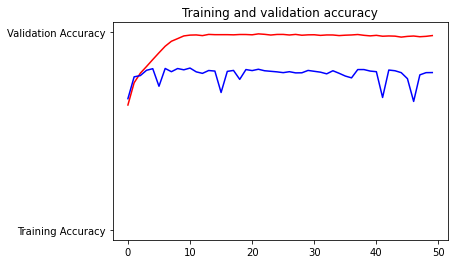

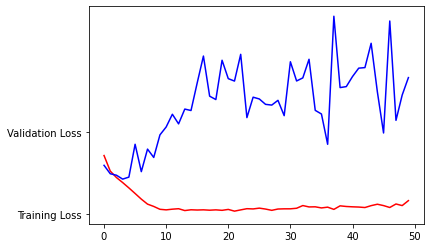

<Figure size 432x288 with 0 Axes>

In [18]:
%matplotlib inline 

import matplotlib.image as mping
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()